##  PREDICTION OF CREDIT CARD PAYMENT DEFAULT
###  ALFRED K. HUNG, akh022@gmail.com
###  February 9, 2018

# Definition

## Project Overview

This research project is about predicting credit card payment default which can be used as a baseline to analyze and model other payment default problems with similar characteristics. Defaulting on credit card payment affects not only financial issuers but also cardholders as they end up with diminished credit scores, increased fees and interest rates that make it increasingly difficult to fulfill their debt.  This debt burden represents a drag on these individuals, their families and the economy as their resources are put to service debt rather than to improve their wellbeing or put to productive use [1].  Delinquency rates for 2015-16 show a slight increase (2.14% to 2.25%) compared to 2009-15 where there was a downward trend (6.52% to 2.14%). The most recent default rate for Aug. 2017 shows a step up to 3.49%, continuing an upward trend.  Banks have also increased their charge-offs (amount a bank is no longer going after for collection) from 2.93 to 3.17% [2] [3]. The good news is that delinquencies are still below historical averages and below the 2008-10 recession peak of 9% [4]. We can expect this pattern to continue as long as the economy is adding jobs and consumer sentiment is high [5] [6].  However, if a downturn were to happen, we could expect non-payments and charge-offs to jump as high as levels from the past three economic crisis (5.5%, 7.8%, 11%) [7].

With the advent of machine learning, the credit card industry has started using these algorithms to predict payment defaults and take more effective preventive and remedial actions [8].  Every 0.01% increase in delinquency equals to $92.56 million dollars in potential lost revenue [2] [3].  If an algorithm can improve even a fraction of this amount the gains can be significant to credit card issuers and at the same time assist cardholders to manage their debt.

The motivation of this project is to explore machine learning models and features that help predict credit card delinquency and determine the most accurate model among them.  Previous research work in this area used CART, KNN, SVM, ANN, logistic regression and random forest to predict delinquent accounts demonstrating that the domain problem can be solved [9] [10] [11][12].  The original research of this dataset aimed at estimating the probability of default rather than the binary result of classification [13].  

The dataset “Default of credit card clients” is from the UCI Machine Learning Repository:
__[dataset](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)__


## Problem Statement

The goal of this project is to classify cardholders into either good or bad accounts, where a bad account is a client who is likely to default payment the next month.  This is a supervised learning problem where the dataset supplies a target variable along with 23 independent features.  The authors of this dataset already explored the possible solutions using KNN, LR, DA, NB, ANN and CT, opting for ANN as the best model for its highest coefficient of determination.  Their work estimated the real probability of default rather than doing a classification which is the intent of this project. Either way, the problem has at least a relevant potential solution, is quantifiable, measurable and reproducible.

The tasks to undertake to solve this problem are as follows:
 
1. Data exploration and visualization: (a) Descriptive statistics: produce different types of statistics to understand the distribution of the data; (b) Computation of statistics: calculate more precise statistics to get more insights on the data and the default patterns; (c) Plotting: produce a series of plots to understand the relationships between features and target variable, and between all features

2. Categorical transformation: Transform categorical columns to numeric using dummy variables or one-hot encoding, hereby increasing the number of features 

3. Feature selection: Reduce the number of features using Recursive Feature Elimination with Cross Validation (RFECV) with Random Forest's feature importances method

4. Partition into training and testing sets: (a) The dataset will be randomly shuffled using StratifiedShuffleSplit (SSS); (b) The data will be split into 75% training and 25% testing sets

5. Data preprocessing: (a) Analyze correlation among features to determine if eliminating highly correlated predictors would help the models, (b) perform boxcox to transform skewed data into more normalized shapes, (c) check for outliers and whether to delete any, (d) perform scaling of features to reduce overinfluence of large predictors

6. Measurement: Use F1 score as a metric for this imbalance dataset

7. Modeling: (a) Benchmark model: use Random Forest as baseline comparison; (b) Project models: train Artificial Neural Networks, XGBoost and Logistic Regression

8. Evaluation and Prediction: (a) Make predictions on the training and testing data set using all models; (b) Measure their F1 accuracies; (c) Choose the model with the best testing accuracy

9. Best Model Improvement: (a) Fine tune the final model using RandomizedSearchCV with 2 parameters tuned with 3-5 different values; (b) Calculate final accuracy

10. Conclusions: (a) Compare results against the benchmark; (b) Discuss final model and parameters

The intended solution for this problem is a classification of the testing data set where cardholders will be segmented into good accounts and bad accounts, or into those likely to default payment the next month or not.  The best model chosen should have the highest classification accuracy among the three models but also outperform the benchmark. The expected classification accuracy should be about 0.80 similar to other classification problems of this type [12].  

## Metrics

This is an imbalance dataset as only 22.12% of the target data shows default in payment. The response variable 'Y' is binary  where default-in-payment-next-month is represented by 1 and no-default by 0. Defaults are made of 6,636 instances out of 30,000 clients while non-default are 23,364 (77.88%). 

Measuring the prediction accuracy of an imbalanced dataset would only reflect the underlying class distribution (78% / 12%) regardless of the label (default payment) we want to predict. Standard classification algorithms are often biased towards the majority class and therefore misclassifies minority class instances at a higher rate. Moreover, using accuracy as a measure does not distinguish between the number of correctly classified examples of different classes and may lead to erroneous conclusions. 

$Accuracy = \frac{\mbox{(True Positive + True Negative)}}{\mbox{ (True Positive + True Negative + False Positive + False Negative)}}$

Accuracy is the percentage of all observations that are correctly classified or the number of correctly classified observations divided by the total number of observations.

To account for the minority class properly, we use the F1 score which takes into consideration class distributions. F1 score is the harmonic mean of precision and recall. Precision (or Positive Predictive Value) is the number of correct positive results divided by the number of all positive results. Recall (or True Positive Rate or Sensitivity) is the number of correct positive results divided by the number of positive results that should have been returned:

$Precision = \frac{\mbox{True Positive}}{\mbox{(True Positive + False Positive)}}$

$Recall = \frac{\mbox{True Positive}}{\mbox{(True Positive + False Negative)}}$

Both can be visualized in a 2 $\times$ 2 binary classification matrix more easily:

|      |   Actual Positive      |     Actual Negative     |
|-----------|:--------------:|:--------------:|
|  |         |       |
| **Predicted Positive**  |  True Positive | False Positive |
|  **Predicted Negative**  | False Negative |  True Negative |

where:

$F1 = 2 \times \frac{\mbox{(Precision} \times \mbox{Recall)}}{\mbox{(Precision + Recall)}}$

Compared with Accuracy, the F1 score does not take True Negative into consideration. Thus, the parameter 'pos_label' set to '0' in the f1_score function will focus precision and recall measurements on the clients who did not default on their payments. Using instead 'average = weighted' will calculate metrics for each label and find their average weighted by the number of true instances for each label (support). 

The F1 score has its best value at 1 and worst at 0. The best model should have both high precision and recall. It is high when both precision and recall are high but low when either precision or recall is low. A relatively equal contribution by both balances the risks of both type I error (false positive) and type II error (false negative). 

To use F1 score with RFECV and RandomizedSearchCV, we setup an F1 scoring function with make_scorer. 


In [2]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
f1_scorer = make_scorer(f1_score, average='weighted')

# Analysis

## Data Exploration

The dataset "Default of credit card clients" contains 30,000 observations from payment data of credit card clients in Taiwan. There are 23 features with a mix of categorical and numerical variables:

Response variable 'Y': 'Yes' = 1 means default payment next month, 'No' = 0 means no default payment 

X1 (numerical) : Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2 (categorical) : Gender (1 = male; 2 = female). 

X3 (categorical) : Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others). 

X4 (categorical) : Marital status (0 = others; 1 = married; 2 = single; 3 = divorce). 

X5 (numerical): Age (year). 

X6 - X11 (categorical) History of past payment or past monthly payment records (from September to April, 2005): 

X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .; X11 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: 
-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17 (numerical) : Amount of bill statement (NT dollar):

X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23 (numerical) : Amount of previous payment (NT dollar): 

X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005. 


### Categorical data

There are three categorical features (gender, education, marital status) and six categorical time series (payment delay):

+ There are no missing, null or NaN values
+ The 'Sex' feature shows a 60/40 ratio of females/males
+ The 'Mar' feature shows more Singles 53% than Married couples 46%, leaving Divorce and Others with 1.26%
+ The 'Edu' feature shows that college level clients accounts for 47%, graduate 35%, high school 16% and other educational levels (0, 4, 5, 6) 1.56%
+ For Payment Delay features ('DSep', 'DAug', 'DJul', 'DJun', 'DMay', 'DApr'):
    +  In any given month, 77-90% of people don't default
    +  Of those who don't default, 62% use revolving credit, 22% pay in full, 16% did not consume
    +  Of those who default, 76% delay payment for 2 months, 15% delay for 1 month, 6% delay for 3 months


**Transfomation options:**

+ For marital status, Divorce and Others can be combined into one value (eg. 0) since they represent 1.26% of the data
+ Education levels (0, 4, 5, 6) represent 1.56% that they could be combined (replaced) into a single level (eg. 0)
+ Payment Delay features with values (-2, -1, 0) can be combined into one value (eg. 0).  However, their large presence (77-90%) can be significant in separating non-defaults from defaults. For example, value '-2' is 9-16%, value '-1' is 18-20%, and value '0' is 49-56%. 
+ Determining the replacement of values: We ran a combination of scenarios where values were replaced and not replaced for all three types of features. The result was that the models yielded better test scores without any replacements for marital status, education and payment delays. 
* All categorical features are transformed to dummy variables so that models can run properly
* Feature Selection is done after deploying all dummy columns

### Continuous data

There are two continuous features (credit limits, age) and two continuous time series (billings, payments):

+ There are no missing, null or NaN values
+ Feature 'Lim' has 81 credit limit values, 'Age' has 56 while the rest have in excess of 7,000
+ Feature 'Age' has different value unit from the rest which have NT dollars
+ Except for 'Age' (median 34, mean 35), the other numerical features have their means much higher than their medians
+ Except for 'Age' (std 9), all features, especially time series, have their standard deviations almost as large or larger than their means (ex. PSep mean 5,663, std 16,563)
+ Except for 'Age' (difference of 58), the difference between maximum and minimum values for the rest of the features vary greatly from 426,529 to 1,821,353
+ Billing features ('BSep', 'BAug', 'BJul', 'BJun', 'BMay', 'BApr') have negative minimum values with range (-339603, -69777)
+ Payment features ('PSep', 'PAug', 'PJul', 'PJun', 'PMay', 'PApr') have zero minimum values

**Transfomation options:**

+ Features having their means higher than their medians suggests the presence of outliers. Outliers have a significant influence on the data and can unduly skew results. Boxcox transformation can rein many of them in
+ Large differences in values due to different value units (eg. age vs. NT dollars) and large spread in the data can make models place more emphasis on larger features than the smaller ones. Scaling them to (0, 1) would help to even out the influence of large features
+ Time series features with negative and zero values cannot be processed by boxcox. They can be shifted to become positive numbers by adding their minimum value plus one
+ For additional calculations on the continuous features, they can be grouped in five quantiles. Each quantile will have equal number of observations which permit to see the differential characteristics in each


### Statistics on Default Payment

Instead of doing boxplots, histograms of categorical features and other simple plots, we opt to calculate default statistics as the proportion of defaults can be distinguished more clearly. The reason is that the difference of those who defaulted and those who don't are visually so small that these plots add no value, besides being too many of them. The calculations reveal that:

+ Males default at a higher rate 24% than females 21% (ie. comparing females who defaulted with total females)
+ High school level clients default more at 25%, college 24% and graduate 19%
+ Divorced clients default more at 26%, Married 24% and Single 21%
+ Age defaults are higher at the fifth quantile (24.32%) and first quantile (24.20%). The others are below 22%
+ A client who delays payment for at least a month will invariably default the next month (25-83%). Groups (-2, -1, 0) with no payment delays default at a rate below the 22.12% average for all months
+ Clients with credit limit amounts located in the first (31.79%) and second (25.80%) quantiles show the larger defaults
+ Clients with billing amounts in the third (24.78%) and first (23.30%) quantiles show the larger defaults
+ Clients who default make smaller rather than larger payments, with amounts located in the first quantile (34.22%)
+ Using a combination of features to understand default patterns:
    +  Combining (Sex, Marital Status, Education), the top three defaults belong to Male & Divorced: graduate (33%), high school (31%), college (30%)
    +  Combining (Age, Education, Sex), three cases with 100% default are (age 73, high school, female), (age 67, college, female), (age 73, college, female)
    +  Combining (Credit Limit, Education, Sex), three cases with 100% default are (600,000 credit limit, college, male), (720,000 credit limit, graduate, male), (520,000 credit limit, high school, male)

**Transfomation options:**

+ Even though Divorced represents less than 1.26% of the data, it's over represented as a default variable. Not combining it with 'Others' can assist in identifying defaults
+ Clients in the oldest age group (5th quantile) may appear as outliers when the mean age is 35. However, they default at a higher rate which argue for not deleting them as outliers
+ At a first glance, there are no consistent features that dominate defaults in the majority of occasions


In [3]:
# Import libraries and methods
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.feature_selection import RFECV
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from IPython.display import display
import gc
%matplotlib inline
# Reclaims memory occupied by objects that are no longer in use by the program 
gc.enable()

# Load the dataset
# Label columns with abbreviations. For monthly columns: 'D' for Delay, 'B' for Billing, 'P' for Payment
nam = ['Lim', 'Sex', 'Edu', 'Mar', 'Age', 'DSep', 'DAug', 'DJul', 'DJun', 'DMay', 'DApr', 'BSep', 'BAug', 'BJul', 'BJun', 'BMay', 'BApr', 'PSep', 'PAug', 'PJul', 'PJun', 'PMay', 'PApr', 'y']
# Set categorical columns as string type
conv = {"SEX":str, "EDUCATION":str, "MARRIAGE":str, "PAY_0":str, "PAY_2":str, "PAY_3":str, "PAY_4":str, "PAY_5":str,"PAY_6":str}
# Read dataset and do column name conversions
data = pd.read_excel("default of credit card clients.xls", header=0, index_col=0, skiprows=1, names = nam, converters = conv)


In [76]:
# Show the list of columns
print "\nFeature columns:\n\n{}".format(list(data.columns))

# Show the feature information by printing the first five rows
print "\nFeature values:"
display(data.head(3))

# Summary statistics of dataset
print "\nSummary Statistics:"
display(data.describe())

nrows = data.shape[0]
print "\nCredit Dataset:"
print "Total number of observations: {}".format(nrows)

ncols = data.shape[1]-1
print "Total number of features: {}".format(ncols)

# Calculate total defaults
deft = sum(data.y)
print "\nCredit Statistics:"
print "Total Credit Defaults: {}".format(deft)

# Calculate total non-defaults
ndeft = nrows - deft
print "Total Credit Non-Defaults: {}".format(ndeft)

# Calculate percentage of defaults
pct_deft = deft*100./nrows
print "Default percentage: {:.2f}%".format(pct_deft)

# Percentage of males and females
s = data.shape[0]
f = data.Sex.value_counts()[0]*100./s
print "\nSex Feature Breakdown:"
print "Females: {:.2f}%".format(f)
print "Males: {:.2f}%".format(100.-f)

# Percentage of each Educational level
c = data.Edu.value_counts()[0]*100./s
g = data.Edu.value_counts()[1]*100./s
h = data.Edu.value_counts()[2]*100./s
print "\nEducation Feature Breakdown:"
print "Graduate level: {:.2f}%".format(g)
print "College level: {:.2f}%".format(c)
print "High School level: {:.2f}%".format(h)
print "Other educational levels: {:.2f}%".format(100.-(g + c + h))

# Percentage of each Marital Status
sg = data.Mar.value_counts()[0]*100./s
mr = data.Mar.value_counts()[1]*100./s
print "\nMarital Status Feature Breakdown:"
print "Married: {:.2f}%".format(mr)
print "Singles: {:.2f}%".format(sg)
print "Divorce and Other: {:.2f}%".format(100.-(mr + sg))

# Percentage of Payment Delays [-2, -1, 0]
dcols = [ feat for feat in nam if feat.startswith('D') ]
dc = data[dcols] # Get Payment delay data
d1 = pd.DataFrame(data['DSep'].value_counts()) # get number count for Sep
for i in dcols[1:7]: # exclude 'DSep' in loop
    d2 = pd.DataFrame(dc[i].value_counts()) # Get number count for next month
    d1 = pd.merge(d1, d2, left_index=True, right_index=True, how='outer') # put both counted columns together
d1['sum'] = d1.sum(axis=1) # sum all rows and put in 'sum' column
d11 = d1.iloc[:3,:] # create separate table for data of clients who pay on time
d11 = d11.copy()
d11['pct'] = pd.Series.round(d11['sum']*100/d11['sum'].sum(), 2) # calculate percentages of clients who pay on time
print "\nCounts and percentage of clients without payment delays:"
display(d11)

# Percentage of values [-2, -1, 0] in Delay columns
d11['DSep_pct'] = pd.Series.round(d11['DSep']*100/data.shape[0], 2) # calculate percentage of each value category for Sep
d11['DMay_pct'] = pd.Series.round(d11['DMay']*100/data.shape[0], 2) # calculate percentage of each value category for May
d11.loc['Total'] = pd.DataFrame.sum(d11, axis=0) # calculate totals
print "\nPayment Delay Feature Breakdown (sample):"
display(d11[['DSep_pct', 'DMay_pct']])

# Percentage of Payment Delays 1 thru 8 
d12 = d1.iloc[3:11,:] # get table of columns with payment delays
d12 = d12.copy()
d12['pct'] = pd.Series.round(d12['sum']*100/d12['sum'].sum(), 2) # get percentages
print "\nCounts and percentage of clients with payment delays from 1 to 8 months:"
display(d12)

# Numerical Features
print "\nSample values for numerical features:"
col = ['Lim', 'Age', 'BSep', 'PSep']
for cl in col:
    print "Feature {} has {} values".format(cl, len(data[cl].value_counts()))
    
# Range: maximum and Minimum
print "\nSample range for numerical features:"
col = ['Age', 'BJul', 'PMay']
for cl in col:
    dif = max(data[cl])-min(data[cl])
    print "Feature {} has max-min difference of {:,}".format(cl, dif)
       
# Calculation function for percent defaults per feature
def pct_calc2(dfr, feat, arg=""):
    vals = list(np.unique(dfr[feat]))
    print "\nPercent default for{}:".format(arg)
    for v in vals:
        s0 = sum((dfr[feat] == v) & (dfr['y'] == 0))
        s1 = sum((dfr[feat] == v) & (dfr['y'] == 1))
        s01 = float(s1)*100/(s0+s1)
        print "{}={} is {:.2f}%".format(feat, v, s01)

# Calculations for Sex, Edu, Mar
col = ['Sex', 'Edu', 'Mar']
for cl in col:
    pct_calc2(data, cl)

# Sample calculations for Delay Payment feature
txt = ' (sample)'
pct_calc2(data, 'DSep', txt)

# Get default percentages for numerical features
cols = data.columns[data.dtypes=='int64']
datc2 = data.copy()
datc2 = datc2[cols]
# Split continuous columns into quartile ranges
col = ['Age', 'Lim', 'BSep', 'PSep']
for cl in col:
    datc2[cl] = list(pd.qcut(datc2[cl].values, 5, duplicates='drop').codes)

# Sample calculations for numerical features
txt = ' (5 quantiles)'
for cl in col:
    pct_calc2(datc2, cl, txt)

# Calculation function for 3 features:
def pct_calc3(dfr, feat1, feat2, feat3):
    lst = []
    val1 = list(np.unique(dfr[feat1]))
    val2 = list(np.unique(dfr[feat2]))
    val3 = list(np.unique(dfr[feat3]))
    for x in val3:
        for w in val2:
            for v in val1:
                s0 = sum((dfr[feat1] == v) & (dfr[feat2] == w) & (dfr[feat3] == x) & (dfr['y'] == 0))
                s1 = sum((dfr[feat1] == v) & (dfr[feat2] == w) & (dfr[feat3] == x) & (dfr['y'] == 1))
                s01 = (s0+s1)
                if s01 == 0:
                    continue
                sm = float(s1)*100/s01
                lst.append([v, w, x, round(sm, 2)])
    cols = [feat1,  feat2, feat3, '%_default']
    df = pd.DataFrame(lst, columns=cols)
    df = df.sort_values('%_default', ascending=False)
    print "\nTop 3 defaults for three feature combination:"
    return display(df.head(3))

pct_calc3(data, 'Sex', 'Mar', 'Edu')
pct_calc3(data, 'Age', 'Edu', 'Sex')
pct_calc3(data, 'Lim', 'Edu', 'Sex')



Feature columns:

['Lim', 'Sex', 'Edu', 'Mar', 'Age', 'DSep', 'DAug', 'DJul', 'DJun', 'DMay', 'DApr', 'BSep', 'BAug', 'BJul', 'BJun', 'BMay', 'BApr', 'PSep', 'PAug', 'PJul', 'PJun', 'PMay', 'PApr', 'y']

Feature values:


,Lim,Sex,Edu,Mar,Age,DSep,DAug,DJul,DJun,DMay,...,BJun,BMay,BApr,PSep,PAug,PJul,PJun,PMay,PApr,y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0



Summary Statistics:


,Lim,Age,BSep,BAug,BJul,BJun,BMay,BApr,PSep,PAug,PJul,PJun,PMay,PApr,y
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000



Credit Dataset:
Total number of observations: 30000
Total number of features: 23

Credit Statistics:
Total Credit Defaults: 6636
Total Credit Non-Defaults: 23364
Default percentage: 22.12%

Sex Feature Breakdown:
Females: 60.37%
Males: 39.63%

Education Feature Breakdown:
Graduate level: 35.28%
College level: 46.77%
High School level: 16.39%
Other educational levels: 1.56%

Marital Status Feature Breakdown:
Married: 45.53%
Singles: 53.21%
Divorce and Other: 1.26%

Counts and percentage of clients without payment delays:


,DSep,DAug,DJul,DJun,DMay,DApr,sum,pct
-1,5686,6050,5938,5687,5539.0,5740.0,34640.0,22.35
-2,2759,3782,4085,4348,4546.0,4895.0,24415.0,15.75
0,14737,15730,15764,16455,16947.0,16286.0,95919.0,61.89



Payment Delay Feature Breakdown (sample):


,DSep_pct,DMay_pct
-1,18.95,18.46
-2,9.20,15.15
0,49.12,56.49
Total,77.27,90.10



Counts and percentage of clients with payment delays from 1 to 8 months:


,DSep,DAug,DJul,DJun,DMay,DApr,sum,pct
1,3688,28,4,2,NaN,NaN,3722.0,14.87
2,2667,3927,3819,3159,2626.0,2766.0,18964.0,75.78
3,322,326,240,180,178.0,184.0,1430.0,5.71
4,76,99,76,69,84.0,49.0,453.0,1.81
5,26,25,21,35,17.0,13.0,137.0,0.55
6,11,12,23,5,4.0,19.0,74.0,0.30
7,9,20,27,58,58.0,46.0,218.0,0.87
8,19,1,3,2,1.0,2.0,28.0,0.11



Sample values for numerical features:
Feature Lim has 81 values
Feature Age has 56 values
Feature BSep has 22723 values
Feature PSep has 7943 values

Sample range for numerical features:
Feature Age has max-min difference of 58
Feature BJul has max-min difference of 1,821,353
Feature PMay has max-min difference of 426,529

Percent default for:
Sex=1 is 24.17%
Sex=2 is 20.78%

Percent default for:
Edu=0 is 0.00%
Edu=1 is 19.23%
Edu=2 is 23.73%
Edu=3 is 25.16%
Edu=4 is 5.69%
Edu=5 is 6.43%
Edu=6 is 15.69%

Percent default for:
Mar=0 is 9.26%
Mar=1 is 23.47%
Mar=2 is 20.93%
Mar=3 is 26.01%

Percent default for (sample):
DSep=-1 is 16.78%
DSep=-2 is 13.23%
DSep=0 is 12.81%
DSep=1 is 33.95%
DSep=2 is 69.14%
DSep=3 is 75.78%
DSep=4 is 68.42%
DSep=5 is 50.00%
DSep=6 is 54.55%
DSep=7 is 77.78%
DSep=8 is 57.89%

Percent default for (5 quantiles):
Age=0 is 24.20%
Age=1 is 19.59%
Age=2 is 20.51%
Age=3 is 21.76%
Age=4 is 24.32%

Percent default for (5 quantiles):
Lim=0 is 31.79%
Lim=1 is 25.80%
L

,Sex,Mar,Edu,%_default
10,1,3,1,33.33
26,1,3,3,30.56
18,1,3,2,30.16



Top 3 defaults for three feature combination:


,Age,Edu,Sex,%_default
461,40,6,2,100.0
224,48,6,1,100.0
454,22,6,2,100.0



Top 3 defaults for three feature combination:


,Lim,Edu,Sex,%_default
135,600000,2,1,100.0
267,260000,6,1,100.0
76,720000,1,1,100.0


## Exploratory Visualization 

The goal of exploratory visualization is to understand patterns in the data by doing simple to complex graphs that can guide additional calculations or transformations. In supporting the statistics of the previous section, we seek to plot distribution of features, relationships between features and feature values that can trigger default.  

+ The pair plots (Graph 1) show that all continuous features are skewed to the right (see diagonal) which support the previous conclusion of applying log transformations to them. 

+ For boxplots of Age by Education and Sex (Graph 2), the medians and data distributions for major subcategories 1-3 aren't much different whether y=0 or y=1.  High School defaults are higher than college or graduate but they are similar to the non-defaults.

+ The same conclusion can be drawn for the boxplots of Age by Marriage Status and Sex (Graph 3).  The medians and data distributions for major subcategories 1-2 aren't much different whether y=0 or y=1. Married default is higher than Singles but it is similar to the non-default.  The median Default for Divorce & Single is higher than the non-default group indicating a differentiating characteristic.

+ For the boxplots of Credit Limits by Education and Sex (Graph 4), the medians of Defaults are significantly lower than the medians for non-defaults.  The same thing applies to the boxplots of Credit Limits by Marriage Status and Sex (Graph 5).

+ Graphs 6 and 7 which show average Billings and Payments are truncated to amplify the lowest part of their skewed distributions. Defaults are higher at the lower billing and payment amounts and steadily decrease at higher amounts, confirming previous calculations. 

+ Histograms of Age by Sex (Graph 8) show that non-defaults for Males peak about late twenties while defaults keep steady until about late thirties. For Females, non-defaults peak about late twenties while defaults remain high during the twenties and slowly decrease from thereon. 

+ Histograms of Credit Limit by Sex (Graph 9) show that defaults and non-defaults are highest for both sexes at the lower limits (around 50,000) then drop off significantly thereafter.  Credit limits assigned are concentrated at the lower limits than at higher ones, for males it's below 50,000 aproximately and for females it's below 200,000.  

**Transformation options**

+ All continuous feature distributions are skewed to the right. Applying boxcox transformation can make them more normalized 
+ Many of the smallest features (graphs 2, 4, 5) show higher defaults as evidenced by their differentiating medians, distributions or outliers (Edu = 4, 5, 6), (Mar = 3). As they seem important, it suggests they should not be combined or replaced
+ Plots add additional information to the calculations and provide insights that are more easily visible


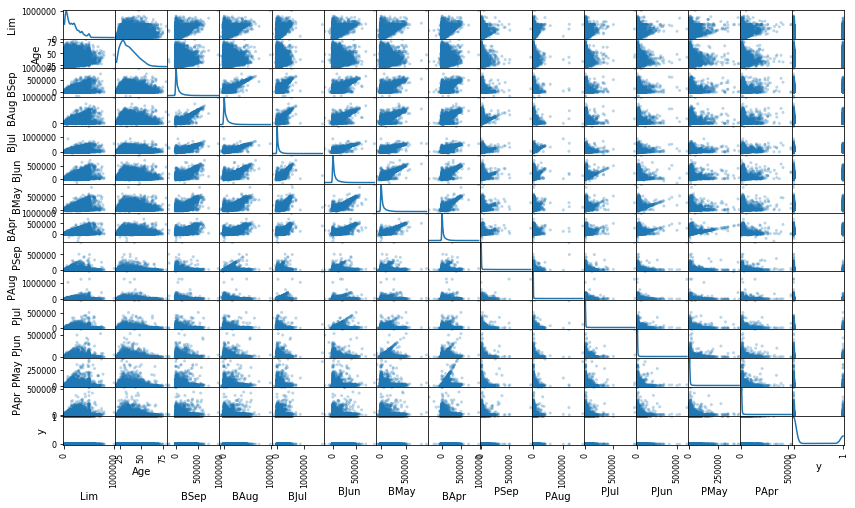

In [4]:
### Pair plots with Correlation numbers
# Produce a scatter matrix for each pair of features in the data
axes = pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')


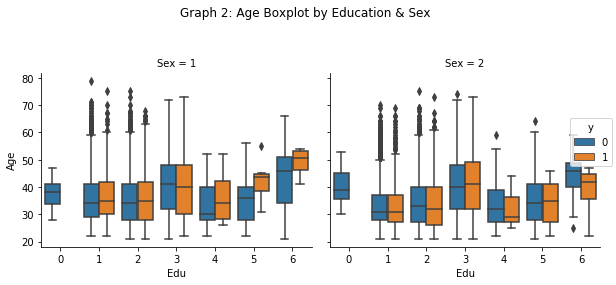

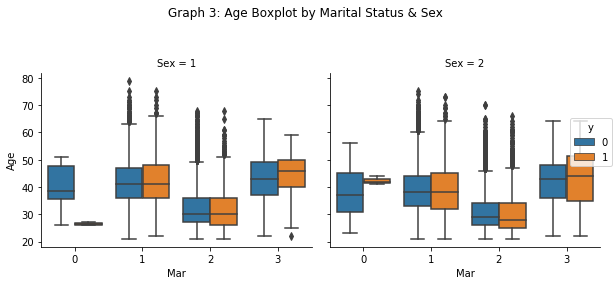

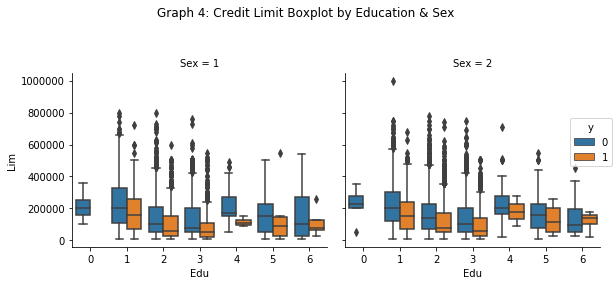

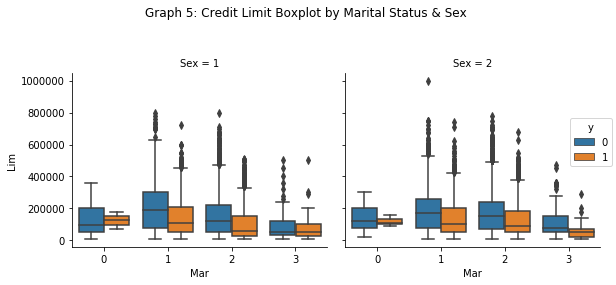

In [77]:
### Categorical plots
# Multiple features plot with Categorical and Continuous features
g = sns.factorplot(x="Edu", y="Age", hue="y",
               col="Sex", data=data, kind="box", size=4, aspect=1, margin_titles=True)
g.fig.suptitle("Graph 2: Age Boxplot by Education & Sex\n")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()
# Age vs. Marital by Sex columns
g = sns.factorplot(x="Mar", y="Age", hue="y",
               col="Sex", data=data, kind="box", size=4, aspect=1, margin_titles=True)
g.fig.suptitle("Graph 3: Age Boxplot by Marital Status & Sex\n")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()
# Credit limit vs. Education by Sex Columns
g = sns.factorplot(x="Edu", y="Lim", hue="y",
               col="Sex", data=data, kind="box", size=4, aspect=1, margin_titles=True)
g.fig.suptitle("Graph 4: Credit Limit Boxplot by Education & Sex\n")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()
# Credit Limit vs. Marital by Sex Columns
g = sns.factorplot(x="Mar", y="Lim", hue="y",
               col="Sex", data=data, kind="box", size=4, aspect=1, margin_titles=True)
g.fig.suptitle("Graph 5: Credit Limit Boxplot by Marital Status & Sex\n")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()


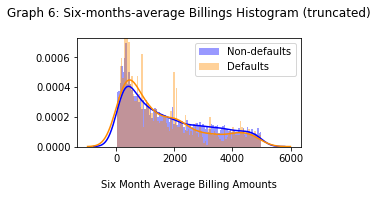

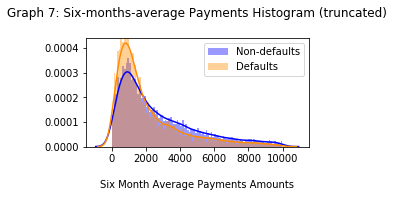

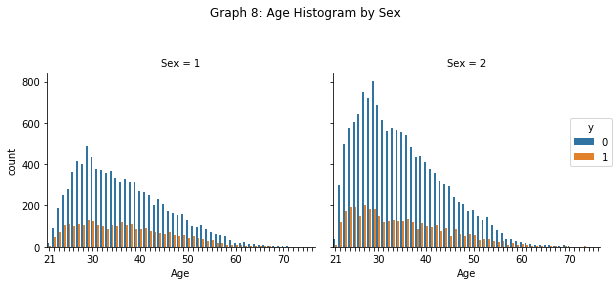

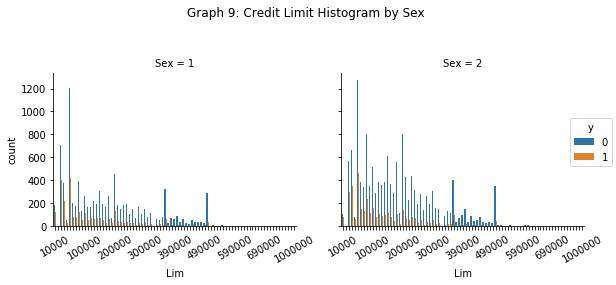

In [78]:
### Continuous features plots

# Billings histogram
Bcols = [ feat for feat in nam if feat.startswith('B') ]  # get billing columns only
datc2['Bavg'] = datc2[Bcols].sum(axis=1)/6 # calculate average billings
# focus on densest part of histogram except negative, zero billings; differentiate by default class  
filtered0 = datc2.Bavg[(datc2.Bavg >= 10) & (datc2.Bavg < 5000) & (datc2.y == 0)] 
filtered1 = datc2.Bavg[(datc2.Bavg >= 10) & (datc2.Bavg < 5000) & (datc2.y == 1) ]
plt.figure(figsize=(4,2)) # set graph size
# plot 100-bins histograms with density curve
sns.distplot(filtered0, kde=True, hist=True, bins=100, label='Non-defaults', color="blue")
sns.distplot(filtered1, kde=True, hist=True, bins=100, label='Defaults', color="darkorange")
plt.title("Graph 6: Six-months-average Billings Histogram (truncated)\n")
plt.xlabel('\nSix Month Average Billing Amounts\n')
plt.legend()
plt.show()

# Payments histogram
Pcols = [ feat for feat in nam if feat.startswith('P') ] # get payments columns only
datc2['Pavg'] = datc2[Pcols].sum(axis=1)/6 # calculate average payments
# focus on densest part of histogram excepting zero payments; differentiate by default class
filtered0 = datc2.Pavg[(datc2.Pavg >= 10) & (datc2.Pavg < 10000) & (datc2.y == 0) ]
filtered1 = datc2.Pavg[(datc2.Pavg >= 10) & (datc2.Pavg < 10000) & (datc2.y == 1) ]
plt.figure(figsize=(4,2)) # set graph size
# plot 100-bins histograms with density curve
sns.distplot(filtered0, kde=True, hist=True, bins=100, label='Non-defaults', color="blue")
sns.distplot(filtered1, kde=True, hist=True, bins=100, label='Defaults', color="darkorange")
plt.title("Graph 7: Six-months-average Payments Histogram (truncated)\n")
plt.xlabel('\nSix Month Average Payments Amounts\n')
plt.legend()
plt.show()

# Histogram comparisons
g = sns.factorplot(x="Age", col="Sex", hue="y", data=data, kind="count", size=4, aspect=1, margin_titles=True)
xt = np.append(0, np.arange(9, 60, 10)) 
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if i not in xt : labels[i] = '' # label every 10 ticks, skip the rest
    ax.set_xticklabels(labels) # set new labels
g.fig.suptitle("Graph 8: Age Histogram by Sex\n")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()

# Histogram of credit limit by Sex columns
g = sns.factorplot(x="Lim", col="Sex", hue="y", data=data, kind="count", size=4, aspect=1, margin_titles=True)
xt = np.arange(0, 90, 10)
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if i not in xt : labels[i] = '' # label every 10 ticks, skip the rest
    ax.set_xticklabels(labels, rotation=30) # set new labels
g.fig.suptitle("Graph 9: Credit Limit Histogram by Sex\n")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.show()


## Algorithms and Techniques

The algorithms that are appropriate for this project's binary classification problem are class probabilistic or rule-based such as Artificial Neural Networks, XGBoost and Logistic Regression:


### Artificial Neural Network: Multi-layer Perceptron Classifier

MLPClassifier is a network of at least three layers of artificial neurons (input layer, hidden layers and output layer) where the information moves in only a forward direction from the input nodes, through the hidden nodes and to the output nodes. Each neuron in one layer is connected through weights to the neurons in the next layer. The receiving neurons process the input signals using an activation function which by default is the rectified linear unit function:

$\normalsize{f(x) = \max(0, x)}$

where x is the input to a neuron. It has output 0 if the input is less than 0, and output is equal to the input otherwise.

![](Perceptron1.jpg)<img src="Perceptron1.jpg" width="400" height="400" />![](Multilayer1.png)<img src="Multilayer1.png" width="400" height="400" />

Learning occurs in the hidden layers (called perceptron) by changing connection weights after each piece of data is processed, based on the amount of error in the output compared to the expected result [14]. To adjust weights properly, the algorithm uses the default 'adam' stochastic gradient-based optimizer. This optimizer finds the local minimum of the loss function by incremental iteration. The errors are calculated at the output and distributed back through the network layers (backpropagation).

**Justification:**

+ Pros: it's accurate, deals well with large number of features, complex layers, noisy and missing data

+ Cons: features needs to be normal, scaled and not correlated. Encoded categorical features helps improve accuracy. It requires lots of training data as it may overfit small datasets. It requires tuning a number of hyperparameters, can take longer time to run, often converges on local minima of the error function rather than global minima

+ Reason to use: It deals well with large number of features and can be used with default parameters. 


### XGBoost or eXtreme Gradient Boosting

XGBoost is an implementation of gradient boosting machines. Its default is the gradient boosting decision tree algorithm. It seeks to create a strong prediction model in the form of an ensemble of weak decision tree models. New decision tree models are created to predict the residuals or errors of prior models and then added together to make the final prediction. It uses a gradient descent algorithm to minimize the loss when adding new models. Models are added sequentially until no further improvements can be made [15]. 

![](GBM.jpg)
<img src="GBM.jpg" width="400" height="400" />

XGBoost adjusts its default parameters dynamically upon checking the training set. It sets its objective function from 'reg:linear' to 'binary:logistic', max_depth from 6 to 3, max_delta_step (for each tree's weight estimation to help with imbalance datasets) from 0 to 10.  The other parameters are left as original defaults. 

**Justification:**

+ Pros: it's very fast, accurate, memory efficient, scalable, handles missing data automatically, can parallelize tree construction across several CPU cores. It provides good results without any pre-processing. With default parameters, it manages well outliers, imbalanced data, non-normal distributions and correlated features

+ Cons: It needs categorical features to be numeric

+ Reason to use: It outperforms many other models and is a winning algorithm in many Kaggle competitions. It can deal with imbalanced data and is accurate with default parameters.


### Logistic Regression

Logistic regression is a method for fitting a regression curve where the outcome is a categorical variable with two possible outcomes usually in the form of 0 and 1 (binary). The predictors can be continuous, categorical or a mix of both. Logistic regression models the probability of the default class. To convert these probabilities to binary values, we transform them using the logistic function given by [16]:

${\normalsize{F(x)=\Large{\frac {1}{1+e^{-(\beta _{0}+\beta _{1}x)}}}}}$    $\epsilon$  (0,1) for all x

Where:

F(x) = probability of success of the target variable

$\beta_{0}$ = the intercept of the equation 

$\beta_{1}$ = the regression coefficient of the predictor variable(s)

![](LRcurve.png)
<img src="LRcurve.png" width="400" height="400" />

We use all default parameters for LR except for class_weight. Class weight is set to 'balanced' mode so it uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data:


$\large{\frac{\textrm{number of samples}}{\textrm{number of classes x bin counts in y}}}$

where bin count are the non-default/default classes in 'y'

**Justification:**

+ Pros: It's fast, accurate. It doesn't require a linear relationship between dependent and the logit of independent variables.  Homogeneity of variance and normality are not required. It's a probabilistic classifier with high bias, low variance. It's easy to explain to non-technical audiences

+ Cons: It needs features to be independent, with low correlation. Categorical features should be encoded to improve accuracy. It requires observations to be independent of each other. Predictors should be linearly related to the log odds. LR is sensitive to sampling bias, low sample size and outliers. Adding more variables can result in overfitting. It doesn't capture complex relationships between target and features. 

+ Reason to use: it's one of the first models to use for binary classification. It's less prone to overfit and supports class weight for imbalanced datasets. By setting class_weight to "balanced", the algorithm uses the values of Y to automatically adjust weights inversely proportional to class frequencies in the labeled data.


### Techniques

The algorithms described are sensitive to different pre-processing techniques.  Pre-processing should be applied to each as to optimize their testing scores. By considering the needs of the algorithms with the characteristics of the dataset, we can outline a series of steps for the wrangling of the data.

The dataset contains features that are categorical, numerical and time series. The categorical predictors need to be transformed using dummy variables so that the algorithms can process them and provide optimal results. The expanded number of columns beyond the original 23 would go through feature selection to reduce overfitting and improve accuracy. Further reduction in overfitting could be done by eliminating predictors with high correlations (greater than 0.9). The skewed data would be transformed to more normalized distributions using boxcox. We check outliers and whether any needs to be deleted. Then we can constrain their range by scaling them between zero and one. Modeling can proceed once all of these pre-processing steps are done.

Payment Delays, Billing and Payment features are not univariate time series but rather they are multi-chunk time series that run over a period of six months. This short time span doesn't permit the modeling of seasonal, cyclical patterns and fluctuations using methods such as ARIMA and simple exponential smoothing. From the correlation heat map further down, we can see that a next value of these predictors is not necessarily affected by the previous one and each variable from a sequence is not strongly correlated with the next one, with the exception of the Billing predictors which show high correlations among themselves. In this project I plan to utilize these three category features as if they were independent, not part of a time series. The resulting testing scores should indicate how valid this approach is and potentially provide an additional pathway to tackle mixed-feature-types problems such as this. Analysis using more advanced algorithms such as Recurrent Neural Networks can be left for future improvements.


In [79]:
#### General Functions for training and prediction 

# Set up general functions for training, prediction, train scoring and test scoring
def train_classifier(clf, X_train, y_train):
    # Fits a classifier to the training data
    clf.fit(X_train, y_train)
    
def predict_labels(clf, features, target):
    # Makes predictions using a fit classifier based on F1 score
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, average='weighted')

def train_predict(clf, X_train, y_train, X_test, y_test):
    # Train and predict using a classifer based on F1 score
    # Indicate the classifier
    print "\nTraining and Prediction using a {} : ".format(clf.__class__.__name__)
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.6f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.6f}.".format(predict_labels(clf, X_test, y_test))


# Separate the data into feature data and target data 
y = data['y']
data = data.drop(labels='y', axis=1)

# Set up general seed for random state to make results reproducible 
rs = 57

# Save copy for the computation of benchmark's sensitivity distribution
data_c1 = data.copy()


### Partition into training and testing sets (1)

Before computing the benchmark, we split the dataset into 75% training (22,500) and 25% testing (7,500) sets . The training set allows for the model to get trained in the data while the testing set allows the model to validate its predictive performance with new data. Training a model is not sufficient if we don't know what results it will throw, if its predictions are worse than existing models, or if it performs below simple heuristics or common sense. We want the train/test sets to resemble as much as possible to real world data to avoid unpleasant surprises.  By doing random sampling, we get two sets that are accurate representation of the original dataset. By doing stratification, we get equal representations of their outcome classes (non-default/default).  By having a training size larger than a testing size, we get a larger portion for training so the models can have sufficient number of observations to learn the patterns in an unbiased manner. The smaller test portion serves to evaluate, rank and select models, to select a right-sized model when needed, and to have an honest assessment of the predictive capabilities on unseen real world data. 

Train/test splitting uses StratifiedShuffleSplit which is appropriate for imbalance datasets. It randomly shuffles and splits the data into "n" equal-sized-subsample folds (ie. specified by n_splits) where each fold maintains a training and testing set with a 78/12 ratio of non-default/default class values consistent with the source dataset. For this project we use 20 folds. It returns train and test indices to split data in train and test sets. The results are stored in X_train, X_test, y_train, and y_test. With the use of a constant number for random_state these same results can be reproduced later. 

StratifiedShuffleSplit is a merge of StratifiedKFold and ShuffleSplit. Its resulting structure is employed for cross-validation. As mentioned, each fold has a training subset that is used to train the data and a test subset that is used once as a validation. RFECV and RandomizedSearchCV utilize cross validation to reduce variability where multiple rounds are performed using the 20 partitions, and the validation results are averaged over the rounds to estimate a final score to select features, parameters and model. The average of multiple prediction errors are a more accurate estimate of model prediction performance than any single prediction. The metric used is the F1-score over all rounds. 


In [80]:
#### Partition into training and testing sets

# Shuffle and split the dataset into a 75/25 ratio of training and testing points for the benchmark

sss = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=rs)
for train_index, test_index in sss.split(data, y):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])


Training set has 22500 samples.
Testing set has 7500 samples.


## Benchmark

Random Forest is a popular benchmark algorithm as it can do classification and deals well with continuous, categorical, linear and non-linear features.  The plan is to train and test a simple version of random forest on the project data then compare it with the above selected models to see if they can outperform the benchmark.

**How Random Forest Works**

The random forest algorithm uses multiple decision trees rather than a single one.  

+ After classifying a new object, each tree votes for a class and the forest chooses the classification having the most votes over all the trees in the forest
+ Each tree in the ensemble is built from a sample drawn with replacement from the training set
+ When splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features, instead, the split that is picked is the best split among a random subset of the features 
+ As a result of this randomness, the bias of the forest usually slightly increases with respect to the bias of a single non-random tree but, due to averaging, its variance also decreases, usually more than compensating for the increase in bias, hence yielding an overall better model

**Random Forest**

+ Pros: it's a fast, accurate algorithm that is not affected by lack of feature encoding, normalization, scaling, missing or imbalanced data. It requires very little feature engineering and parameter tuning. Its default parameters provide decent results. It provides information on feature selection through its feature importances method. It's easier to explain than other models as it relies on decision trees. 
+ Cons: it may overfit with increasing number of features, noisy data and correlated variables. With correlated features, strong features can end up with low feature ranking scores and the method can be biased towards variables with many categories. 
+ Reason to use: It's robust, easy to use and provides good accuracy. It avails the parameter class_weight='balanced' for imbalanced datasets

The random forest classifier fits a number of decision tree classifiers on various sub-samples of the dataset and uses weighted averaging to improve the predictive accuracy and control overfitting. The subsample size is proportional to the classes of the original input sample size but the samples are drawn with replacement.

We run Random Forest with the parameter class_weight equal to "balanced". The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to its class frequencies:

$\large\frac{\textrm{number of samples}}{\textrm{number of classes x bin counts in y}}$

where bin count are the non-default/default classes in 'y'.

Training and predicting with Random Forest (RF) yields a training score of 0.978783 and a testing score of 0.776010. This testing score is the benchmark that all the other models should try to improve upon. Compared with the dataset's default rate of 22.12%, RF's default rate is a little higher at 22.40%. 

Random Forest provides a list of feature importance (see below) where the higher the feature the more it contributes to the performance of the model.  The results show that 'DSep', 'Age', 'Lim', four Billing and three Payment features are among the ten most relevant.  We could select the top 10-15 features to use in a model but to be more precise about this number we'll use Recursive Feature Elimination which provides a methodical way to eliminate the least important predictors.


In [81]:
#### Benchmark

# Set up Benchmark model
clf = RandomForestClassifier(random_state=rs, class_weight='balanced')
print "\nBenchmark Model:"
# Train and get prediction for benchmark
train_predict(clf, X_train, y_train, X_test, y_test)

# Save test score result for sensitivity distribution (Justification section)
lst2 = []
lst2.append(predict_labels(clf, X_test, y_test))

# Feature Ranking results from Random Forest
# Get order of importance of features
fi = pd.DataFrame({'Feature':data.columns, 'Feat_Imptc':clf.feature_importances_})
# Sort values in descending order
fisv = fi.sort_values(['Feat_Imptc', 'Feature'], ascending=[False, True])
print "\nFeature importances (top ten):"
display(fisv[:10])



Benchmark Model:

Training and Prediction using a RandomForestClassifier : 
F1 score for training set: 0.978783.
F1 score for test set: 0.776010.

Feature importances (top ten):


,Feat_Imptc,Feature
5,0.103693,DSep
11,0.062947,BSep
4,0.062082,Age
0,0.059882,Lim
18,0.056301,PAug
17,0.054326,PSep
19,0.052045,PJul
12,0.051466,BAug
14,0.050503,BJun
13,0.049292,BJul


# Methodology

## Data Preprocessing

### Libraries

In order to do the calculations, plotting and modeling, we use Python libraries that are relevant to what we need to accomplish: numpy, pandas, scipy, sklearn, seaborn, matplotlib. These libraries contain a collection of packages that altogether provide some generic functionality that can be used by specific applications. Within these packages there are modules which we can call to perform an application that we're interested in. To use the modules in these libraries, we load them using the command "import" as shown on the beginning code. 

* Numpy is a library that supports the operation of large, multi-dimensional arrays and matrices, and high-level mathematical functions

* Pandas is a library that supports data manipulation and analysis, and offers data structures and operations for manipulating numerical tables and time series.

* Scipy is a library that supports scientific and technical computing and includes modules for optimization, linear algebra, integration, interpolation, sparse matrix, spatial functions, clustering, statistics, and others.

* Sklearn is a library that supports machine learning operations such as pre-processing, dimensionality reduction, model selection, classification, regression and clustering algorithms. It is designed to work with NumPy and SciPy. It includes models such as linear regression, random forests, XGBClassifier, MLPClassifier, and many others.

* Matplotlib is a library that supports plotting histograms, power spectra, bar charts, error charts, scatterplots, etc, with just a few lines of code.

* Seaborn is a library that supports statistical data visualization based on matplotlib. It provides a high-level interface for drawing statistical graphics easily.


### Feature Transformation: Conversion to dummy variables

This dataset contains nine categorical features { 'Sex', 'Edu', 'Mar', 'DSep', 'DAug', 'DJul', 'DJun', 'DMay', 'DApr' } whose non-numerical values cannot be processed properly by the algorithms. To get their numerical equivalents, we convert each categorical feature to its binary form using dummy variables. Continuous features are left untouched. The new features created are made of the old feature's name, followed by a period and each of its category values. The dummy method drops the first level of the converted feature as this level can be expressed as a combination of the remaining levels, and assists to prevent redundancy and thus overfitting. The final number of features increases by 59 from 23 to 82. 


In [82]:
#### Categorical Feature Transformation
# Transform categorical data using dummy variables
data = pd.get_dummies(data, prefix_sep='.', drop_first=True)

# View transformed columns
print "\nFeature columns processed with dummy indicators ({} total features):\n\n{}\n".format(len(data.columns), list(data.columns))

# Save copy of data for sensitivity analysis
data_c2 = data.copy()



Feature columns processed with dummy indicators (82 total features):

['Lim', 'Age', 'BSep', 'BAug', 'BJul', 'BJun', 'BMay', 'BApr', 'PSep', 'PAug', 'PJul', 'PJun', 'PMay', 'PApr', 'Sex.2', 'Edu.1', 'Edu.2', 'Edu.3', 'Edu.4', 'Edu.5', 'Edu.6', 'Mar.1', 'Mar.2', 'Mar.3', 'DSep.-2', 'DSep.0', 'DSep.1', 'DSep.2', 'DSep.3', 'DSep.4', 'DSep.5', 'DSep.6', 'DSep.7', 'DSep.8', 'DAug.-2', 'DAug.0', 'DAug.1', 'DAug.2', 'DAug.3', 'DAug.4', 'DAug.5', 'DAug.6', 'DAug.7', 'DAug.8', 'DJul.-2', 'DJul.0', 'DJul.1', 'DJul.2', 'DJul.3', 'DJul.4', 'DJul.5', 'DJul.6', 'DJul.7', 'DJul.8', 'DJun.-2', 'DJun.0', 'DJun.1', 'DJun.2', 'DJun.3', 'DJun.4', 'DJun.5', 'DJun.6', 'DJun.7', 'DJun.8', 'DMay.-2', 'DMay.0', 'DMay.2', 'DMay.3', 'DMay.4', 'DMay.5', 'DMay.6', 'DMay.7', 'DMay.8', 'DApr.-2', 'DApr.0', 'DApr.2', 'DApr.3', 'DApr.4', 'DApr.5', 'DApr.6', 'DApr.7', 'DApr.8']



### Partition into training and testing sets (2)

We apply train/test split to the expanded number of variables to prepare them for RFECV processing. 


In [83]:
# Shuffle and split the expanded dataset after applying dummy vars
sss = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=rs)
for train_index, test_index in sss.split(data, y):
    X_train1, X_test1 = data.iloc[train_index], data.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]


### Feature Selection: Recursive Feature Elimination with Cross Validation 

The expanded eighty-two features are a large number which can include irrelevant, redundant attributes, can lead to overfitting and loss in accuracy. To optimize this number, we apply Recursive Feature Elimination (RFE) with Cross Validation (RFECV) using Random Forest (RF) as the estimator. This method runs RFE with RF and a selected number of features beginning at 1 up to the maximum of 82. At each number iteration, it goes through each of the "n" folds set up using StratifiedShuffleSplit. RFE uses the training set of the fold to train RF on the initial set of features, selects features by pruning the least important one listed by RF's feature importances and does this operation again until it reaches the specified number of features. It uses the F1-score to obtain a validation score at the testing set of the fold, does this for every fold, averages them out, and saves the result belonging to that number of features. This process of cross validation helps in providing more reliable accuracy scores that can used to generalize to unseen data. Finally, it selects the number of features with the highest average score which contains the ranking and mask of selected features. The mask (rfecv.support_) is then used to extract the optimal features for optimized model performance. 

The optimized 50 features include all continuous predictors and a pruned set of the categorical variables. A 32 reduction from 82 is significant, should help to prevent overfitting and provide better scores.  


In [84]:
#### Feature Selection: Recursive Feature Elimination with Cross Validation

# Set up the estimator
clf = RandomForestClassifier(random_state=rs, class_weight='balanced')
# Setup Recursive Feature Elimination with Cross Validation
rfecv = RFECV(estimator=clf, step=1, cv=sss, scoring=f1_scorer, n_jobs=-1)
# Train RFECV
rfecv.fit(X_train1, y_train1)  
print("\nOptimal number of features : %d" % rfecv.n_features_)  
# Get and show selected feature columns
sel_cols = data.columns[rfecv.support_]
print "\nSelected Features by RFECV:\n\n{}".format(sel_cols)

# Get dataset with optimized features
data = data[sel_cols].copy()



Optimal number of features : 50

Selected Features by RFECV:

Index([u'Lim', u'Age', u'BSep', u'BAug', u'BJul', u'BJun', u'BMay', u'BApr',
       u'PSep', u'PAug', u'PJul', u'PJun', u'PMay', u'PApr', u'Sex.2',
       u'Edu.1', u'Edu.2', u'Edu.3', u'Edu.5', u'Edu.6', u'Mar.1', u'Mar.2',
       u'Mar.3', u'DSep.-2', u'DSep.0', u'DSep.1', u'DSep.2', u'DSep.3',
       u'DSep.4', u'DAug.-2', u'DAug.0', u'DAug.2', u'DAug.3', u'DAug.4',
       u'DJul.-2', u'DJul.0', u'DJul.2', u'DJul.3', u'DJun.-2', u'DJun.0',
       u'DJun.2', u'DJun.3', u'DMay.-2', u'DMay.0', u'DMay.2', u'DMay.3',
       u'DApr.-2', u'DApr.0', u'DApr.2', u'DApr.3'],
      dtype='object')


Graph 10 shows how RFECV went about selecting the best number of features based on cross validation scores. The shape of the curve is an inversed 'L' where scores show progressively little marginal improvements and a flat tendency after about twenty features with a tiny peak at fifty. 

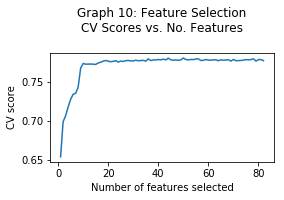

In [85]:
# Plot number of features vs. cross-validation scores

plt.figure(figsize=(4,2))
plt.title('Graph 10: Feature Selection\nCV Scores vs. No. Features\n')
plt.xlabel("Number of features selected")
plt.ylabel("CV score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


### Correlation of Selected Features

Correlation is a statistical measure that indicates a mutual relationship or association between variables or the extent to which two or more variables move in the same direction together. A positive correlation indicates the extent to which those variables increase or decrease in parallel. A negative correlation indicates the extent to which one variable increases as the other decreases. Correlation can help to predict one quantity from another. 

A correlation coefficient is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another. However, correlation does not imply causation as there may be an unknown factor that influences both variables similarly. The coefficients can vary from +1 to -1. Values close to +1 indicate a high degree of positive correlation, and values close to -1 indicate a high degree of negative correlation. Values close to zero indicate poor correlation of either kind and 0 indicates no correlation at all. 

The most widely used correlation coefficient is Pearson which measures the linear association between continuous variables. Pearson correlation is given by: 

${\displaystyle r_{xy}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}$

where:

$r_{xy}$ is the sample correlation coefficient

$\large{\bar{x}}$, $\large{\bar{y}}$ are the means of $\large{x}$ and $\large{y}$

The Pearson correlation "r" centers observations by subtracting their means and re-scales them by dividing by their standard deviations. 

Pearson correlation relies on means and standard deviations which makes it sensitive to outliers. An outlier may decrease the value of a correlation coefficient and weaken the linear relationship, but it also may increase a correlation value and improve the linear equation such as in the case of influential outliers. We can expect that outliers from the selected features effect correlations positively but after applying boxcox the influence of outliers on the data should diminish.

Below, we use the function 'corr' which has Pearson's correlation as default.  The correlation heat map shows few selected features with very high correlations. These include all Billing features and Marital Status for Married (1) and Single (2) whose correlations are (+/-) 0.9, as shown in the table. 

Because ANN and LR require low correlated predictors, it was necessary to study how eliminating a group of them would affect the final results.  We ran several scenarios where a varying number of highly correlated variables were removed. The correlation coefficients did improve but the test scores got worse.  Leaving all variables intact produced the higher scores. Although highly correlated predictors in principle introduce redundancies, complexities and can increase the number of local minima, they are left in place as the models appear to extract value-added information from them. 


In [25]:
#### Correlations 

# Extract correlations above 0.9
corr = data.corr().unstack().reset_index() # group together pairwise
corr.columns = ['feat1','feat2','corr'] # rename columns
# Show correlation results above 0.9 and exclude self-correlated variables (corr = 1)
print "\n\nSelected Features Correlated above 0.9"
display( corr[ (corr['corr'].abs() > 0.9) & (corr['feat1'] != corr['feat2']) ] ) 




Selected Features Correlated above 0.9


,feat1,feat2,corr
103,BSep,BAug,0.951484
152,BAug,BSep,0.951484
154,BAug,BJul,0.928326
203,BJul,BAug,0.928326
205,BJul,BJun,0.923969
254,BJun,BJul,0.923969
256,BJun,BMay,0.940134
257,BJun,BApr,0.900941
305,BMay,BJun,0.940134
307,BMay,BApr,0.946197


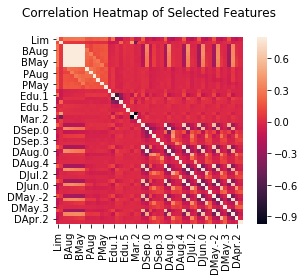

In [73]:
# Correlation Heatmap

# Get correlation matrix
corrmat = data.corr()
# Plot heatmap
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.title('Correlation Heatmap of Selected Features\n')
plt.tight_layout()
plt.show()


### Partition into training and testing sets (3)

Before applying boxcox, we use StratifiedShuffleSplit again to split the selected features into train and test sets in preparation for modeling.  Once the original features changed, it's as if we started anew with a new dataset.  


In [86]:
# Shuffle and split the feature-selected dataset

sss = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=rs)
for train_index, test_index in sss.split(data, y):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


### Feature Transformation: Box-Cox 

The Box-Cox transformation is a transform function that is used to stabilize variance and make a dataset look more like a normal distribution. Normally distributed data allows the results from statistical tests to be generalizable to a population. Moreover,
if a model's assumption of normality is not satisfied, then the results of the statistical analysis may be incorrect and have low predictive value.

As previously discussed, all continuous variables show asymmetrical distributions with longer tails on the right side, meaning less variability on the left side and more on the right. This asymmetry can lead to bias in the models and generate spurious interactions due to non-constant variations. Models such as ANN need normally distributed data and near-constant variances. LR and tree-based models such as Random Forest and XGBoost do not make any assumptions on the normality of the features. 

Boxcox implements the best transformation for each feature which could be logarithmic or not. It is given by the following equation where the transformation of y is:

${\displaystyle y_{i}^{(\lambda )}={\begin{cases}{\dfrac {y_{i}^{\lambda }-1}{\lambda }}&{\text{if }}\lambda \neq 0,\\[8pt]\ln {(y_{i})}&{\text{if }}\lambda =0\end{cases}}}$

The exponent lambda (λ) varies from -5 to 5 where all values of λ are considered for each feature. The optimal lambda value that is selected is the one which results in the best approximation of a normal distribution curve, or the lambda that maximizes the log-likelihood function. Boxcox returns lambda as the second output argument after transforming the training data. This lambda value is then applied to the testing data rather than letting boxcox calculate the testing set's own lambda so that both transformed sets can be interpreted equally. 

Boxcox only takes positive, non-zero values which is not an issue for features 'Lim' and "Age'. But for the six Billings features which have negative values, they can be shifted by their minimum value so they can become positive and then by +1 so they can become non-zero. As for the six Payment features which have zero minimum values, they can be shifted by +1 so they can also become non-zero.  The addition of a constant to both features does not alter the shapes of their original distributions. 

Graph 11 shows that the features appear a lot more normal after power transformations by boxcox. 
 

Graph 11: X_train's histograms of numerical features after applying boxcox


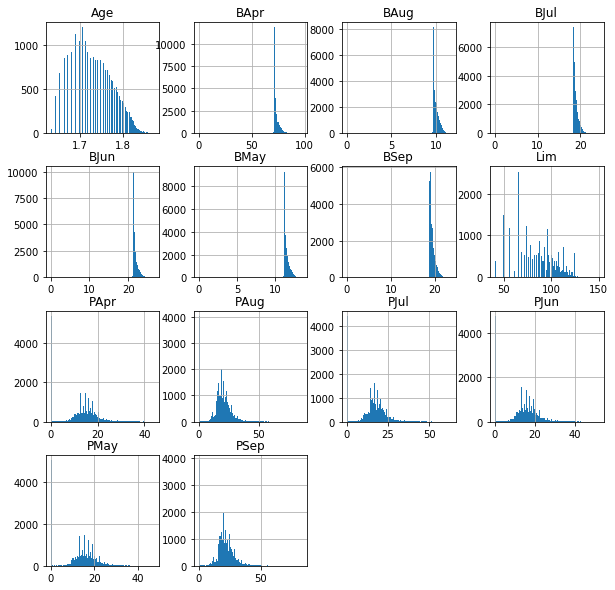

In [87]:
#### Feature Transformation: Boxcox 

# Transform numerical features to a more normal-looking distribution using Boxcox
X_train = X_train.copy()
X_test = X_test.copy()

# Transform Lim and Age features
numcol = ['Lim', 'Age']
for feat in numcol:
    X_train.loc[:, feat], lambda_ = boxcox(X_train[feat])
    X_test.loc[:, feat] = boxcox(X_test[feat], lmbda=lambda_)

# Transform Billing and Payment features that have negative or zero values by shifting by the minimum value + 1
numcol = Bcols + Pcols
for feat in numcol:
    X_train.loc[:, feat], lambda_ = boxcox(X_train[feat] + abs(min(X_train[feat])) + 1)
    X_test.loc[:, feat] = boxcox(X_test[feat] + abs(min(X_test[feat])) + 1, lmbda=lambda_)

# Plot numerical features after boxcox
print "Graph 11: X_train's histograms of numerical features after applying boxcox"
X_train[X_train.dtypes[X_train.dtypes=="float64"].index.values].hist(bins=100, figsize=[10,10])
plt.show()


### Outliers Detection

There are significant signs of outliers in the data where feature means are much larger than their medians. Outliers can also be seen in a boxplot where they are the points that lie outside the box and the whiskers. In the normalized distribution plots after boxcox (Graph 11), they are the values on the tails of the distribution. 

Outliers are extreme values that appear abnormal, fall far outside of core observations or the overall pattern of data. Their presence skew data interpretations, drive algorithms into longer training times and produce less accuracy results.  

However, the definition of outliers is specific to each context or domain. In our case, anomalous data can represent relevant and important instances of credit-payment-default patterns. 

One way to identify them is using Tukey's Method which is a well known approach that utilizes the interquartile range to differentiate abnormal data. The interquartile range (IQR) is given by the lower (Q1) and upper quartiles (Q3), where:

$IQR = Q_{3} - Q_{1}$

Then, an outlier is any observation that falls:

below   $Q_{1} – (1.5 \times IQR)$    and

above   $Q_{3} + (1.5 \times IQR)$


In the results below, most features have outliers ranging from the single digit up to 21%.  Many of the features with the largest outliers also have high default rates (see previous tables) and are among the top ten feature importances:

+ Feature 'Edu.3' (high school) with 16.46% outliers have the highest default rate (25.16%) in the education category 
+ Feature 'Mar.3' (divorced), the only Marital status with outliers at 1.10%, have the highest default (26.01%) in its category
+ Features PSep (21%), PAug (20.68%) have the most outliers of any feature and are no. 6 & 5 in the feature importances list
+ Billing features 'BSep', 'BAug', 'BJul, 'BJun' with 1.99% - 5.93% outliers are among the top ten feature importances
+ Delay Payment features 'DSep.2' thru 'DApr.2' with 8.70% - 12.98% outliers have high default rates at about 69%

The aggregate total of all outliers without duplicate observations represent 68.16%. Being such a large number and the fact that they appear to be critical in detecting default patterns, outliers are central to the dataset and should remain part of the modeling data.


In [16]:
#### Outliers Detection

outliers = []
print "\nNumber and percentage of outliers per feature:\n"
# For each feature find the data points with extreme high or low values
for feature in X_train.keys():
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(X_train[feature], 25)
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(X_train[feature], 75)
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    # Identify the outliers
    out_list = X_train[~((X_train[feature] >= Q1 - step) & (X_train[feature] <= Q3 + step))]
    # Print outliers
    print "{} is {} or {:.2f}%".format(feature, len(out_list), len(out_list)*100./X_train.shape[0])
    # Save outliers in list
    outliers.extend(list(out_list.index))

# Sort, delete duplicates from outlier index then put back into a list
outliers = list(set(sorted(outliers)))
print "\nTotal number of outliers is {:,} or {:.2f}%\n".format(len(outliers), len(outliers)*100./X_train.shape[0])



Number and percentage of outliers per feature:

Lim is 0 or 0.00%
Age is 0 or 0.00%
BSep is 1029 or 4.57%
BAug is 447 or 1.99%
BJul is 1171 or 5.20%
BJun is 1334 or 5.93%
BMay is 897 or 3.99%
BApr is 1765 or 7.84%
PSep is 4724 or 21.00%
PAug is 4652 or 20.68%
PJul is 383 or 1.70%
PJun is 350 or 1.56%
PMay is 279 or 1.24%
PApr is 207 or 0.92%
Sex.2 is 0 or 0.00%
Edu.1 is 0 or 0.00%
Edu.2 is 0 or 0.00%
Edu.3 is 3704 or 16.46%
Edu.5 is 207 or 0.92%
Edu.6 is 41 or 0.18%
Mar.1 is 0 or 0.00%
Mar.2 is 0 or 0.00%
Mar.3 is 247 or 1.10%
DSep.-2 is 2079 or 9.24%
DSep.0 is 0 or 0.00%
DSep.1 is 2715 or 12.07%
DSep.2 is 1992 or 8.85%
DSep.3 is 248 or 1.10%
DSep.4 is 55 or 0.24%
DAug.-2 is 2814 or 12.51%
DAug.0 is 0 or 0.00%
DAug.2 is 2921 or 12.98%
DAug.3 is 238 or 1.06%
DAug.4 is 77 or 0.34%
DJul.-2 is 3063 or 13.61%
DJul.0 is 0 or 0.00%
DJul.2 is 2856 or 12.69%
DJul.3 is 182 or 0.81%
DJun.-2 is 3247 or 14.43%
DJun.0 is 0 or 0.00%
DJun.2 is 2379 or 10.57%
DJun.3 is 130 or 0.58%
DMay.-2 is 3416 or 

### Feature Transformation: Min-Max Scaling

The results of the boxcox transformation have made the means of the features close in value to their medians signifying that outliers have been normalized. However, the features have very different scales as evidenced in their min-max values. This is due to their different units where 'Age' is in years, continuous predictors in NT dollars and categorical features in (0, 1) encoding. For example (see below tables):

+ 'Lim' mean is 84.93, median 86.58, std 21.12, min 40.64, max 149.61

+ 'Age' mean is 1.73, median 1.73, std 0.04, min 1.63, max 1.87

+ 'PSep' mean is 18.52, median 19.51, std 10.72, min 0.0, max 83.33

+ Dummified categorical values in (0, 1) range; mean, median and std are less than 0.5

The wide differences in the variances and range of values impact adversely the predictive performance of the models as the larger features dominate the smaller ones making the algorithms unable to learn from the smaller features correctly. This fact applies to LR and also to ANN which requires data on a 0-1 scale. Decision tree-based estimators such as RF and XGBoost are not affected by these data spreads and are robust to the scaling of data. StandardScaler (mean 0 and unit variance) was tried as an alternative since it can achieve comparable transformation, however, its test scores for all models were not as good as minmax.

MinMaxScaler rescales the data such that all feature values are in the range (0, 1). The transformation is given by:

$\large{X_{rescaled}}\large = \Large\frac{X_{i} - X_{min}}{X_{max} - X_{min}}$

where: 

$X_{i}$ is the i index sample of the feature

$X_{min}$ is the minimum value of the feature

$X_{max}$ is the maximum value of the feature

The estimator is applied by using fit_transform to learn and scale the training data then using only transform on the test data to scale it according to the parameters learned from the training data. This approach avoids introducing future information from new data into the training predictor variables ensuring model quality and generalization power. 


In [88]:
#### Min-Max Scale Transformation

# Show first rows of X_train after boxcox
print "\nX_train after boxcox:"
display(X_train.head(3))

# Statistics after boxcox
print "\nStatistics for X_train after boxcox:"
display(X_train.describe())

# Scale range of feature values within [0, 1]
X_scaler = MinMaxScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# Show first few rows
print "\nX_train after Min-Max Scaling:"
display(X_train[:2])



X_train after boxcox:


,Lim,Age,BSep,BAug,BJul,BJun,BMay,BApr,PSep,PAug,...,DJun.2,DJun.3,DMay.-2,DMay.0,DMay.2,DMay.3,DApr.-2,DApr.0,DApr.2,DApr.3
ID,,,,,,,,,,,,,,,,,,,,,
17757,40.647749,1.809787,18.849231,9.695936,18.338702,21.183712,11.135526,71.516116,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
11260,78.760546,1.725568,19.958535,10.319052,18.476672,21.312627,11.197122,71.758661,10.653837,16.624601,...,0,0,0,1,0,0,0,1,0,0
14965,86.583150,1.673029,18.832610,9.718883,18.326366,21.133181,11.110414,71.376367,23.925993,18.186437,...,0,0,0,0,0,0,0,0,0,0



Statistics for X_train after boxcox:


,Lim,Age,BSep,BAug,BJul,BJun,BMay,BApr,PSep,PAug,...,DJun.2,DJun.3,DMay.-2,DMay.0,DMay.2,DMay.3,DApr.-2,DApr.0,DApr.2,DApr.3
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,...,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,84.931039,1.736974,19.353307,9.977675,18.803714,21.703397,11.417004,73.110152,18.527318,17.224690,...,0.105733,0.005778,0.151822,0.563867,0.087022,0.005867,0.162978,0.541378,0.092667,0.005822
std,21.126060,0.048523,0.651153,0.332002,0.615964,0.712010,0.364954,2.454798,10.727091,10.085481,...,0.307503,0.075793,0.358856,0.495915,0.281874,0.076371,0.369354,0.498296,0.289971,0.076083
min,40.647749,1.632131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.716374,1.697895,18.865305,9.701913,18.342839,21.182611,11.128375,71.459203,15.882279,14.410092,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,86.583150,1.737578,19.112805,9.868020,18.572900,21.445834,11.301585,72.223861,19.512013,18.221604,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,100.689642,1.772606,19.617164,10.155007,19.034169,21.943965,11.571607,73.714765,24.369123,22.924755,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,149.618086,1.873918,23.569355,11.626870,24.211983,26.739876,13.527465,97.725046,83.331626,86.181784,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



X_train after Min-Max Scaling:


array([[ 0.        ,  0.73476403,  0.79973471,  0.8339249 ,  0.75742257,
         0.79221432,  0.82317908,  0.73180949,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.34975387,  0.38644295,  0.84680021,  0.8875176 ,  0.76312097,
         0.79703539,  0.82773248,  0.7342914 ,  0.12784867,  0.19290157,
         0.15310544,  0.18830098,  0.23630821,  0.55893681,  0.        ,
         0.        ,  0.        ,  1.        ,  0.

### Principal Component Analysis

Principal Component Analysis or PCA is a dimensionality reduction algorithm that transforms the features of a dataset into sets of linearly uncorrelated variables (principal components) where their degrees of freedom reproduce most of the variability in the data.  PCA ensures that each newly computed feature is orthogonal or linearly independent to all previously computed ones, minimizing overlaps. It accesses the dataset's covariance structure using matrix calculations and eigenvectors to compute the best unique features that describe the data. PCA orders the principal components by importance or by the size of their variances. Retaining the top most important principal components that describes most of the variation in the data reduces the number of dimensions needed to represent the dataset without much loss of information. The reduced number of components helps to visualize high dimensional dataset, minimizes noise in the data and the chance of overfitting. 

I ran PCA with seven different number of components but am only displaying the four most important runs below. The table shows that Logistic Regression, the best model, has a peak test score at 0.7819 with 10 components and an explained variance of 0.8392. It's not better than the 0.804089 obtained without using PCA. The scores for all seven runs for MLPClassifier and XGBoost were below 0.80. 

|                     | Run 1    | Run 2    | Run 3    | Run 4    |
|---------------------|----------|----------|----------|----------|
| No. Components      | 6        | 10       | 12       | 15       |
| Explained Variance  | 0.7037   | 0.8392   | 0.8791   | 0.9145   |
| LR's Train F1 score | 0.699320 | 0.781915 | 0.775244 | 0.768953 |
| LR's Test F1 score  | 0.695956 | 0.781945 | 0.775195 | 0.764194 |


In [ ]:
### Principal Component Analysis

# Set up temporary X_train, X_test to be used only in this section
X_train_pca = X_train.copy()
X_test_pca = X_test.copy()
# Set up PCA with 10 components and fit it to training data
pca = PCA(n_components=10)
pca.fit(X_train_pca)
# Apply PCA transformation to both training and testing sets
pca_train = pca.transform(X_train_pca)
pca_test = pca.transform(X_test_pca)
# Get PCA components and variance information
pca.components_
pca.explained_variance_
pca.explained_variance_ratio_

# NOTE: (1) In case the reader wants to run this section to see the results in the modeling sections below, 
# please replace X_train_pca with X_train, and X_test_pca with X_test. (2) There is no output shown for this code as
# it's not part of the solution and may confuse the reader if included

# Implementation

## Model Evaluation

In this section we use the transformed dataset to train three models and make predictions on the testing data. All three models use their default parameters except for Logistic Regression which has class_weight set to 'balanced' for imbalance datasets. 

* MLPClassifier performs the worst among all three predictors. It has the highest training score at 0.819701 and the lowest testing score at 0.795361.

* XGBoost is trained with a set of data different from the other two models. Its training set contains dummy encoded features only. It gets a training score of 0.804490 and a test score of 0.796388, which falls in between the two other models. This is its best score after comparing it with three other scenarios where feature selection, boxcox and scaling where applied on the training set. 

* Logistic Regression obtained the lowest training score at 0.774758 and the highest testing score at 0.804089. It's notable that it's the only model whose training score is lower than its testing score suggesting that it did not overfit but generalized much better to new, unseen data than ANN or XGBoost. With a fairly large training sample size of 22,500, it's fair to say that LR did not underfit but it's at a good level of fit. The spread between the train and test scores for ANN is 0.024340 (0.819701-0.795361) and for XGBoost is 0.008102 (0.804490-0.796388) suggesting that ANN may be more overfitted than XGBoost requiring additional manipulation of parameters and predictors to improve performance.

| Model               | Training score | Testing score |
|---------------------|----------------|---------------|
| MLPClassifier       | 0.819701       | 0.795361      |
| XGClassifier        | 0.804490       | 0.796388      |
| Logistic Regression | 0.774758       | 0.804089      |


## Best Performing Model

Best Model's parameters (all default values):

|             | |Logistic Regression |   |  |
|---------------------|----------------|---------------|---------------|---------------|
| 'C': 1.0 | 'solver': 'liblinear' | 'max_iter': 100 | 'penalty': 'l2' | 'tol': 0.0001 |



In [18]:
# Training and Evaluating Models
# Initialize the three models
clf_A = MLPClassifier(random_state=rs)
clf_B = XGBClassifier(seed=rs)
clf_C = LogisticRegression(class_weight='balanced', random_state=rs)

# Set up the models
models = [clf_A, clf_B, clf_C]

# Execute the 'train_predict' function for each classifier
for clf in models:
    print "\n{}:".format(clf.__class__.__name__)
    if clf == clf_B:
        # Predict XGBoost with data transformed with dummy vars only
        train_predict(clf, X_train1, y_train1, X_test1, y_test1)
    else:
         # Predict other models with data transformed with dummy vars, boxcox, min-max scaling
        train_predict(clf, X_train, y_train, X_test, y_test)       

# Choose the Best Model and show its parameters
print "\nParameters of the Best Model: Logistic Regression"
display(clf.get_params(deep=True))

# Save LR's test prediction for sensitivity distribution
LR_pred1 = predict_labels(clf_C, X_test, y_test)


MLPClassifier:

Training and Prediction using a MLPClassifier : 
F1 score for training set: 0.819701.
F1 score for test set: 0.795361.

XGBClassifier:

Training and Prediction using a XGBClassifier : 
F1 score for training set: 0.804490.
F1 score for test set: 0.796388.

LogisticRegression:

Training and Prediction using a LogisticRegression : 
F1 score for training set: 0.774758.
F1 score for test set: 0.804089.

Parameters of the Best Model: Logistic Regression


{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 57,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Refinement: General Parameter Exploration

Model refinement refers to the improvement on the scores obtained by the best model under default parameters. It involves exploring all the different combination of parameters that can yield the best possible score. It can be done in a methodical manner using a matrix of parameter values where every combination is tested or it can be done in a randomized way where a fixed number of parameter settings is sampled from the specified distributions. The approach is to start with the widest set of parameter values then narrow them down to smaller range to pinpoint the best value. In this section we use both RandomizedSearchCV and GridSearchCV with the widest range of 'C' and 'solver' values. They'd serve as a starting point so we can narrow down 'C' to a smaller range such as that shown in the next section [0.0, 1.11]. 

Running both search methods with np.logspace(-5,5,11) produced test scores of 0.785559 and 0.785405 which are not better than the 0.805921 obtained in the next section. The results of both methods are very similar with RandomizedSearchCV being slightly better than GridSearchCV. Since the best 'C' parameter is 0.01, it suggests that further exploration between 0.0 and 1.0 is worth pursuing as the optimal value may be in there somewhere. An additional run using np.logspace(-10,10,20) was made giving even worse results with training F1 score of 0.777749 and testing F1 score of 0.774946 with C=1.6237767391887209e-06 and solver='liblinear'.

|                     | RandomizedSearchCV | GridSearchCV |
|---------------------|:------------------:|:------------:|
| Best Param 'C'      |        0.01        |     0.01     |
| Best Param 'Solver' |        saga        |   liblinear  |
| LR's Train F1 score |      0.779064      |   0.779049   |
| LR's Test F1 score  |      0.785559      |   0.785405   |

In [ ]:
## Approach #1: Using RandomizedSearchCV
# Setup best model's parameters
clf = LogisticRegression(class_weight='balanced', random_state=rs)
# Define parameters and their range of values 
params = {'C': np.logspace(-5,5,11),
          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
# Use randomized search on hyper parameters for fast performance
rand_srch = RandomizedSearchCV(clf, params, scoring = f1_scorer, cv=sss, n_jobs=-1, random_state=rs)
rand_srch.fit(X_train, y_train)
# Get the best estimator
clf = rand_srch.best_estimator_
print "\nThe Parameters for the Tuned Estimator are:"
display(clf)
# Report the final F1 score for training and testing after parameter tuning
print "\n{}'s Tuned Model: \n".format(clf.__class__.__name__)
print "Tuned model has a training F1 score of {:.6f}".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.6f}".format(predict_labels(clf, X_test, y_test))

## Approach #2: Using GridSearchCV
from sklearn.model_selection import GridSearchCV
# Setup best model's parameters
clf = LogisticRegression(class_weight='balanced', random_state=rs)
# Set up hyperparameters and training function
gs = GridSearchCV(clf, params, scoring=f1_scorer, cv=sss, n_jobs=-1)
gs.fit(X_train, y_train)
# Get the best parameters
clf = gs.best_params_
print "\nThe Parameters for the Tuned Estimator are:"
display(clf)
# Report the final F1 score for training and testing after parameter tuning
print "\n{}'s Tuned Model: \n".format(clf.__class__.__name__)
print "Tuned model has a training F1 score of {:.6f}".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.6f}".format(predict_labels(clf, X_test, y_test))

# NOTE: There is no output shown for this code as it's not part of the solution and may confuse the reader if included

## Refinement: Model Tuning

Out of the three algorithms, the one with the best chance of performing better with parameter tuning is the model that got the highest testing score. We optimize Logistic Regression by selecting value parameters that can improve its previous score at 0.804089. There are no additional pre-processing that needs to be done at this stage as all have already been made. 

Parameters 'solver' (optimization algorithm) and 'C' (inverse of regularization strength) are good candidates to start with as they have typically shown to have the most impact in tuning LR. The rest of the parameters are left at their default values.

+ 'solver' refers to the optimization method to find the optimum of the objective function Maximum Likelihood Estimation (MLE). MLE finds the set of values of the model parameters that maximizes the agreement of the selected model with the observed data:  
   
    +  'liblinear' (Library for Large Linear Classification) is the default solver. It is a linear classifier for data with millions of instances and features. It supports L1 and L2 regularization, cross validation for model evaluation, automatic parameter selection, probability estimates for binary classification, and weights for imbalanced data. Its main advantage is that it trains large datasets quickly. 

+ 'C' is part of the L2 regularization used as a default parameter by LR which controls the magnitude of parameter values to prevent overfitting.  L2 is the sum of the squares of the weights of the independent variables multiplied by λ: 

$\large{\lambda\sum_{i=1}^{k}w_i^{2}}$  

and $C = \large{\frac{1}{\large\lambda}}$

The larger λ is the less likely it is that the parameters will be increased in magnitude to adjust for small perturbations in the data. Since 'C' is the inverse, the larger λ is the smaller 'C' is and viceversa. Thus, if the chosen values for 'C' are small, λ values are big.

Based on the results of LR's get_params, we select the initial parameters for 'C' from 0.1 to 1.0 and for solver they can cover all available algorithms {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}. 

We use RandomizedSearchCV as it's less memory intensive, much faster than GridSearchCV for large number of features and produce similar results. RandomizedSearchCV searches only a random subset of the provided parameter values. The number of parameter settings that are tried is given by n_iter. Changing this fixed number trades off runtime versus the quality of the solution.  It's left at its default value of 10. The parameters are optimized by cross-validated search over the parameter settings. This method runs ten randomized parameter values into the estimator LR over 20 stratified shuffle split folds.  It gets an average test score from them measured using the f1 score and runs this operation again for all other randomized parameter values. It outputs the estimator parameters with the best average score as the optimized solution. An important advantage of random search is that it gets to allocate trials to explore dimensions that truly matter rather than to those that are much less important. This efficiency approach lets it do more in less time.  

Running RandomizedSearchCV with different range of 'C' values that overlap produces what seems like inconsistent, random results.  However, they are better described as results with some noise or variance. This type of limited variance is stochastic in nature and RandomizedSearchCV exploits this capability for efficiency purposes.

The following five iterations were run starting with a wide range of 'C' values then down to a narrower range and larger decimal places to explore the possibility of better test scores. Iterations 1, 3, 5 got results that beat the default model's 0.804089. But the best score 0.805921 was at iteration 3, interval (0.51, 1.11) with the 'liblinear' solver. Increasing the precision of the range even further did not produce better results but increased computational time.  

| Iter | Param 'C': np.arange | Best estimator 'C'  | solver      | Train score | Test score |
|------|----------------------|---------------------|-------------|-------------|------------|
| 1    | (0.1, 01.11, 0.1)    | 0.20000000000000001 | 'saga'      | 0.776316    | 0.804588   |
| 2    | (0.1, 0.51, 0.1)     | 0.10000000000000001 | 'saga'      | 0.778125    | 0.802244   |
| 3    | (0.51, 1.11, 0.1)    | 0.51000000000000001 | 'liblinear' | 0.775496    | 0.805921   |
| 4    | (0.50, 0.61, 0.01)   | 0.54000000000000004 | 'liblinear' | 0.775368    | 0.805122   |
| 5    | (0.50, 0.61, 0.001)  | 0.505               | 'liblinear' | 0.775458    | 0.805867   |

Logistic Regression's tuned estimator score 0.805921 improved upon its default model's 0.804089 and benchmark's 0.776010. Compared to the benchmark, the tuned model improved by 0.029911 or 3.85%. The best C is 0.51, half of the its default C value. The best solver is 'liblinear' just like the default. The rest of the parameters are at default values. The final parameters are appropriate, not being too extreme or inordinate.  The final model is reasonable and aligns with solution expectations as the final test score hovers around 0.8 which is a common result for many classification problems, and is close to the results of similar attempts at this problem [12]. 

| Tuned Model:   | Logistic Regression |
|----------------|:-------------------:|
| Training score |       0.775496      |
| Testing score  |       0.805921      |
| C              | 0.51000000000000001 |
| Solver         |     'liblinear'     |
| Penalty        |          L2         |


In [19]:
# Define best algorithm to use in refinement
clf = LogisticRegression(class_weight='balanced', random_state=rs)

# Define parameters and their range of values 
params = {'C': np.arange(0.51, 1.11, 0.1),
          'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}

# Use randomized search on hyper parameters for fast performance
rand_srch = RandomizedSearchCV(clf, params, scoring = f1_scorer, cv=sss, n_jobs=-1, random_state=rs)
rand_srch.fit(X_train, y_train)

# Get the best estimator
clf = rand_srch.best_estimator_
print "\nThe Parameters for the Tuned Estimator are:"
display(clf)

# Report the final F1 score for training and testing after parameter tuning
print "\n{}'s Tuned Model: \n".format(clf.__class__.__name__)
print "Tuned model has a training F1 score of {:.6f}".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.6f}".format(predict_labels(clf, X_test, y_test))



The Parameters for the Tuned Estimator are:


LogisticRegression(C=0.51000000000000001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=57,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression's Tuned Model: 

Tuned model has a training F1 score of 0.775496
Tuned model has a testing F1 score of 0.805921


# Results

## Model Validation: Sensitivity Analysis

The test results from the default and tuned parameters of Logistic Regression demonstrate that it's the best algorithm among the three evaluated. It obtained the best score of 0.804089 and a tuned score of 0.805921.  

These two results along with the results of ANN and XGBoost are dependent on the input data and the environment. To validate the robustness of the model and their solution, we can carry out sensitivity analysis on the models, methods, and techniques that are impacted by stochastic variations and user choices. The variables that are available for modification are the random state, train/test size, number of splits and train set size.

+ Random state affects all three models including Random Forest, StratifiedShuffleSplit and RandomizedSearchCV
+ Train/test size affects the input data to train the models and the test data to validate their performance
+ The number of splits affects StratifiedShuffleSplit only, as different folds impact train/test set composition and scores
+ Train set size affects the input data to feed the models. The test set is left intact 

For each sensitivity variable, we choose a pair of commonly-used values or numbers sufficiently different from the ones used for the current environment:

+ Random state = {12, 111}
+ Test size = {0.15, 0.30}
+ No. splits = {10, 30}
+ Train set size = {30%, 60%} of current training size

We vary one value at a time while keeping the rest constant to gauge Logistic Regression's performance under the new conditions. Then we can compare it to the control results and assess its variability. The control environment refers to our current conditions: 

+ Random state = 57
+ Test size = 0.25
+ No. splits = 20
+ Train set size = 22,500

We also use the same pre-processing, techniques and feature selection from the original dataset so as to vary only one value at a time. The parameters for Logistic Regression are the default, with class_weight equal to 'balanced'. 

After running eight iterations in total : 

+ The number of selected features spans from 27 to 56 but the test scores are limited to a narrow range between 0.794453 to 0.807765. 
+ The test score distribution has mean 0.801746 and median 0.803528 which are very close to the best model's 0.804089
+ Mean and median are higher than the benchmark's score 0.776010. 
+ Mean and median are higher than the scores of ANN 0.795361 and XGBoost 0.796388

| Iter no. | Sensitivity  Variable |     Value    | No. Selected Features | Train Score | Test Score |
|:--------:|-----------------------|:------------:|:---------------------:|:-----------:|:----------:|
|     1    | Random state          |      12      |           50          |   0.773374  |  0.807765  |
|     2    | Random state          |      111     |           27          |   0.766770  |  0.803216  |
|     3    | Test size             |     0.15     |           56          |   0.776423  |  0.794453  |
|     4    | Test size             |     0.30     |           44          |   0.774921  |  0.803841  |
|     5    | No. splits            |      10      |           53          |   0.777717  |  0.800973  |
|     6    | No. splits            |      30      |           51          |   0.776036  |  0.803924  |
|     7    | Train set size        |  6,750 (30%) |           50          |   0.780190  |  0.795378  |
|     8    | Train set size        | 13,500 (60%) |           50          |   0.771524  |  0.804420  |

Small changes in the input data and environment do not affect the results greatly. The narrow variance around the best model's score suggests that LR generalizes well to unseen data. The results show that Logistic Regression is robust and can be trusted to solve this problem. 


In [20]:
#### Sensitivity Analysis for final model

# Function to get test results of sensitivity analysis. It selects features, does boxcox, scaling, training, prediction 
def robustness_test(ns=20, ts=0.25, rs=57, n=22500):
    # Retrieve dataset after dummy vars was applied
    data = data_c2.copy()
    # Get Selected features
    sss = StratifiedShuffleSplit(n_splits=ns, test_size=ts, random_state=rs)
    for train_index, test_index in sss.split(data, y):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(random_state=rs, class_weight='balanced')
    rfecv = RFECV(estimator=clf, step=1, cv=sss, scoring=f1_scorer, n_jobs=-1)
    rfecv.fit(X_train, y_train)
    print("\nOptimal number of features : %d" % rfecv.n_features_) 
    sel_cols = data.columns[rfecv.support_]
    data = data[sel_cols].copy()
    # Perform boxcox
    for train_index, test_index in sss.split(data, y):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = X_train.copy()
    X_test = X_test.copy()
    numcol = ['Lim', 'Age']
    for feat in numcol:
        X_train.loc[:, feat], lambda_ = boxcox(X_train[feat])
        X_test.loc[:, feat] = boxcox(X_test[feat], lmbda=lambda_)
    numcol = ['BSep', 'BAug', 'BJul', 'BJun', 'BMay', 'BApr', 'PSep', 'PAug', 'PJul', 'PJun', 'PMay', 'PApr']
    for feat in numcol:
        X_train.loc[:, feat], lambda_ = boxcox(X_train[feat] + abs(min(X_train[feat])) + 1)
        X_test.loc[:, feat] = boxcox(X_test[feat] + abs(min(X_test[feat])) + 1, lmbda=lambda_)
    # Scale to (0, 1) range
    X_scaler = MinMaxScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)   
    # Train, predict LR using default parameters
    clf_C = LogisticRegression(C=1.0, class_weight='balanced', random_state=rs)
    train_predict(clf_C, X_train[:n], y_train[:n], X_test, y_test)
    lst1.append(predict_labels(clf_C, X_test, y_test))

# Initialize list of all sample test scores
lst1 = []
# Random seed sample (StratifiedShuffleSplit and all models)
rnd = [12, 111]
# Test size sample (StratifiedShuffleSplit)
tst = [0.15, 0.3]
# Number of splits sample (StratifiedShuffleSplit)
npl = [10, 30]
# Sample of train set sizes: 30%, 60% of 22500 (total X_train length)
rws = [int(len(X_train)*0.3), int(len(X_train)*0.6)]
print "\nSensitivity analysis for Random State, Test Size, SSS No. Splits and Train Set Size:"
# Get prediction scores for four sensitivity samples  
for i in rnd:
    print "\n***A. Random state = {}***".format(i)
    robustness_test(rs=i)
for i in tst:
    print "\n***B. Test size = {}***".format(i)
    robustness_test(ts=i)
for i in npl:
    print "\n***C. No. splits = {}***".format(i)
    robustness_test(ns=i)
for i in rws:
    print "\n***D. Train set size (no. rows) = {}***".format(i)
    robustness_test(n=i)

# Show summary statistics of 8 test scores
print "\nSensitivity Test Scores have mean {:.6f}, median {:.6f} and standard deviation {:.6f}.".format(np.mean(lst1), np.median(lst1), np.std(lst1))



Sensitivity analysis for Random State, Test Size, SSS No. Splits and Train Set Size:

***A. Random state = 12***

Optimal number of features : 50

Training and Prediction using a LogisticRegression : 
F1 score for training set: 0.773374.
F1 score for test set: 0.807765.

***A. Random state = 111***

Optimal number of features : 27

Training and Prediction using a LogisticRegression : 
F1 score for training set: 0.766770.
F1 score for test set: 0.803216.

***B. Test size = 0.15***

Optimal number of features : 56

Training and Prediction using a LogisticRegression : 
F1 score for training set: 0.776423.
F1 score for test set: 0.794453.

***B. Test size = 0.3***

Optimal number of features : 44

Training and Prediction using a LogisticRegression : 
F1 score for training set: 0.774921.
F1 score for test set: 0.803841.

***C. No. splits = 10***

Optimal number of features : 53

Training and Prediction using a LogisticRegression : 
F1 score for training set: 0.777717.
F1 score for test set

In [21]:
# Include first LR's prediction in sensitivity distribution
lst1.append(LR_pred1)

# Summary statistics after adding LR's #9 prediction
print "\nLR's Test Score Distribution (9 observations) has mean {:.6f}, median {:.6f} and standard deviation {:.6f}.".format(np.mean(lst1), np.median(lst1), np.std(lst1))



LR's Test Score Distribution (9 observations) has mean 0.802007, median 0.803841 and standard deviation 0.004135.


## Justification: Statistical Significance

Comparing the mean of the distribution of the final model (0.802007) with the benchmark's score (0.776010) yields a difference of 0.025997 which may seem small or not depending on the observer. To get to a more objective evaluation of these two results, we are going to analyze the statistical significance of the means of their distributions to see whether they are significantly different or not. 

Previously we collected nine data points on the final model, eight from the sensitivity distribution and one from the first prediction.  Since we don't have a data distribution for the benchmark, except for the first prediction, we are going to generate it by applying the same sample sensitivity analysis to Random Forest. This include running the model with a couple of samples each of random seed, test size, number of splits, train set size: 

| No. Iter | RF Distribution |
|:--------:|:---------------:|
|     1    |     0.776010    |
|     2    |     0.778794    |
|     3    |     0.780994    |
|     4    |     0.779274    |
|     5    |     0.776501    |
|     6    |     0.772782    |
|     7    |     0.773935    |
|     8    |     0.771460    |
|     9    |     0.769265    |

With both distributions on hand, we can proceed to compute the Student's t-test.  The t-test is a statistical hypothesis test that compares the relationship between two datasets to determine if they are statistically significant. In our case, we are interested in the Independent Two-Sample t-test which examines whether the means of the two datasets are different and how significant the differences are. It requires that both sample sizes are equal, have equal variance and are independent. Both of our distributions have nine data points generated separately and their variances (squared standard deviation) are almost identical:

| Statistic          | Logistic Regression | Random Forest |
|--------------------|:-------------------:|:-------------:|
| Mean               |       0.802007      |    0.775446   |
| Median             |       0.803841      |    0.776010   |
| Standard Deviation |       0.004135      |    0.003675   |


The t statistic is given by:

${\large {t={\frac {{\bar {X}}_{1}-{\bar {X}}_{2}}{{s_{p}}\sqrt {2/n}}}}}$ 

${\large \ s_{p}={\sqrt {\frac {s_{X_{1}}^{2}+s_{X_{2}}^{2}}{2}}}}$ 

where:

n is the sample size

Degrees of freedom is 2n − 2

${\bar {X}}_{1}$ and ${\bar {X}}_{2}$ are the means of each sample

${\large s_{p}}$ is the pooled standard deviation

${\large s_{X_{1}}^{2}}$ and ${\large s_{X_{2}}^{2}}$ are the unbiased estimators of the variances of the two samples


The t-test places under scrutiny the null hypothesis of equal sample means. It's the initial assumption on the condition of the two means that needs to be proven:
 
$H_0$ : $\bar{X}_{1} = \bar{X}_{2}$

$H_a$ : $\bar{X}_{1} \neq \bar{X}_{2}$

where

$H_0$ = the null hypothesis

$H_a$ = the alternative hypothesis

$\bar{X}_{1}$  = the mean of sample 1

$\bar{X}_{2}$  = the mean of sample 2

If the results indicate that we should accept the null hypothesis, then the conclusion is that both means are not significantly different. Otherwise we accept the opposite, the alternative hypothesis $H_a$, that they are significanlty different. 

The t-test applied to both samples gives a test statistic of 13.5796876354 and a p-value of 3.36306716674e-10. This p-value is well below our chosen significance level or cutoff value of 5% (or even 1%) so we reject the null hypothesis. 

The significance level or alpha $\alpha$ is the probability of rejecting the null hypothesis when it is true (Type I error). Using the 5% level of significance means that if the null hypothesis is true, we would get our result 5 times out of 100. There is the risk that our result is not one of those 5 out of 100 so rejecting or accepting the null hypothesis is a gamble. Thus, there is always the possibility of making a mistake in rejecting the null hypothesis. The reason that we take the gamble is because we don't want to miss discovering a true difference. In our case, the p-value is so small that the risk is insignificant.

The p-value is the probability of the test statistic being at least as extreme as the one observed given that the null hypothesis is true. In other words, the p-value is the probability that the samples are from the same population with regards to the dependent variable. The p-value provides an estimate of how often we would get the obtained result by chance, if in fact the null hypothesis were true. Since it's highly unlikely that both averages are equal, we accept the alternative that they are statistically different. 

Now that we know for sure that our best model is stronger than the benchmark we can say that Logistic Regression is a significant enough solution to solve the classification problem of credit card payment default. 


In [22]:
#### Create distribution values for Benchmark model

def benchmark_sensitivity(ns=20, ts=0.25, rs=57, n=22500):
    # Retrieve original dataset used for benchmark
    data = data_c1.copy()
    # Split into train and test sets 
    sss = StratifiedShuffleSplit(n_splits=ns, test_size=ts, random_state=rs)
    for train_index, test_index in sss.split(data, y):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Set up Benchmark model
    clf = RandomForestClassifier(random_state=rs, class_weight='balanced')  
    # Train model
    train_classifier(clf, X_train[:n], y_train[:n])
    # Store prediction results
    lst2.append(predict_labels(clf, X_test, y_test))

# Create distribution data using same sensitivity variables for final model
for i in rnd:
    benchmark_sensitivity(rs=i)
for i in tst:
    benchmark_sensitivity(ts=i)
for i in npl:
    benchmark_sensitivity(ns=i)
for i in rws:
    benchmark_sensitivity(n=i)

print "\nRandom Forest's generated distribution data is:\n\n{}\n".format(lst2)
print "\nThe Random Forest distribution has mean {:6f}, median {:6f} and standard deviation {:6f}.\n".format(np.mean(lst2), np.median(lst2), np.std(lst2))

# Calculation of t-statistics and p-value for statistical significance
from statsmodels.stats.weightstats import ttest_ind as tt

print "\nThe test statistic is {}, the p-value is {} and the degrees of freedom are {}.\n".format(tt(lst1, lst2)[0], tt(lst1, lst2)[1], tt(lst1, lst2)[2])




Random Forest's generated distribution data is:

[0.77600973304291776, 0.77879422117970742, 0.78099439903081069, 0.77927439458689463, 0.7765012124246975, 0.77278185893820417, 0.77393540973196406, 0.77145964629194042, 0.7692653652029231]


The Random Forest distribution has mean 0.775446, median 0.776010 and standard deviation 0.003675.


The test statistic is 13.5796876354, the p-value is 3.36306716674e-10 and the degrees of freedom are 16.0.



# Conclusions

## Concluding Visualization

The visualization in this section aims at determining whether the test score obtained in Logistic Regression's fine-tuning exercise was the best possible value.  The stochastic behavior of RandomizedSearchCV does not seem to cover all specified parameter values so the result was possibly one of the top scores but not the best score. By plotting scores over a wide span of C parameter values, we can see if we can do better.  The second objective is to see the movement of the two curves to check for signs of underfitting.  

Graph 12 below shows Logistic Regression's training and testing score curves over a (0.1 to 1.1) range of 'C' parameter values. The model uses default parameters except for class weight equal to 'balanced'.

The plot shows that as the training-score curve slopes slightly downward and flat the testing-score curve trends upward, comes down a bit then flattens. It reaches its highest point in between the C values of 0.4 and 0.6. Retrieving the maximum value from the stored data table shows that the best test score is 0.805921 at a C of 0.51, which agrees with the best value we got doing fine tuning for the model. This exercise provides further confidence that the parameter values are optimal.  

The fact that the training curve is below the testing curve shows that the model is not overfit.  The model is not underfit either or suffers from high bias as it generalizes well to unseen data shown by the consistent testing scores from the sensitivity analysis under a variety of environmental conditions. As a high bias, low variance algorithm, Logistic Regression requires a large-sample training size, at least 10 observations per feature, which at 22,500 is more than enough to satisfy it. During the sensitivity analysis, we saw how at 30% and 60% sample sizes (0.795378 and 0.804420 respectively) the model held within a steady range of test scores. The fifty selected features, relative to its training size, provide enough complexity to prevent it from underfitting.  Furthermore, the use of cross validation assists in assuring that its results can generalize well to unseen data. In conclusion, the evidence demonstrates that our model achieves a balance close to being low bias, low variance. 


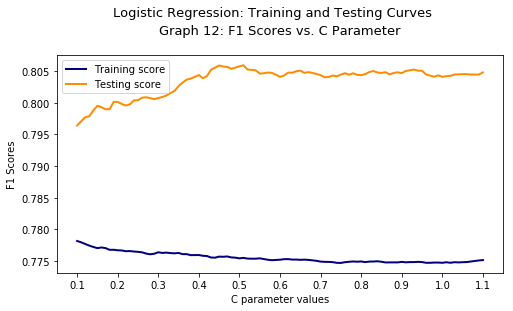

The best test score and its C parameter value in 101 iterations :


,c,train_score,test_score
41,0.51,0.775496,0.805921


In [90]:
#### Visualization of Logistic Regression's scores vs. C parameter values

# Initialize temp storage of results
lst3 = []
# Set range of C parameter values
C = np.arange(0.1, 1.11, 0.01)
# Train, predict best model with range of C parameters
for c in C:    
    clf = LogisticRegression(C=c, class_weight='balanced', random_state=rs)
    train_classifier(clf, X_train, y_train)
    lst3.append([c, predict_labels(clf, X_train, y_train), predict_labels(clf, X_test, y_test)])
# Save predictions and C values for plotting
cols = ['c', 'train_score', 'test_score']
df = pd.DataFrame(lst3, columns=cols)
# Plot titles and labels
plt.figure(figsize=(8,4))
plt.suptitle("Logistic Regression: Training and Testing Curves", y=1.05, fontsize=13)
plt.title("Graph 12: F1 Scores vs. C Parameter\n", fontsize=13)
plt.xlabel("C parameter values")
plt.ylabel("F1 Scores")
plt.xticks(np.arange(0.1, 1.11, 0.1))
lw = 2
# Plot both curves with legend
plt.plot(df.c, df.train_score, label="Training score",
             color="navy", lw=lw)
plt.plot(df.c, df.test_score, label="Testing score",
             color="darkorange", lw=lw)
plt.legend(loc='best', fontsize='medium')
plt.show()

# Display C and the best test score
print "The best test score and its C parameter value in {} iterations :".format(len(df))
display(df[df.test_score==max(df.test_score)])

### Additional Exploration

This additional section seeks to explore the 'C' parameter ranges of np.logspace(-5,5,11).  Running the training and prediction functions with Logistic Regression then extracting the maximum value from all 233 table results gives a best test score of 0.804877 which is less than the 0.805921 achieved. This exercise confirms that the best result was obtained already as shown in the previous visual. 

|    | C    | Train score | Test score |
|----|------|-------------|------------|
| 24 | 1.13 | 0.775112    | 0.804877   |


In [ ]:
#### Visualization of Logistic Regression's scores vs. C parameter values

# Initialize temp storage of results
lst3 = []
# Set range of C parameter values
C = np.logspace(-5,5,11) 
# Train, predict best model with range of C parameters
for c in C:    
    clf = LogisticRegression(C=c, class_weight='balanced', random_state=rs)
    train_classifier(clf, X_train, y_train)
    lst3.append([c, predict_labels(clf, X_train, y_train), predict_labels(clf, X_test, y_test)])
# Save predictions and C values for plotting
cols = ['c', 'train_score', 'test_score']
df = pd.DataFrame(lst3, columns=cols)

# Display C and the best test score
print "\nThe best test score and its C parameter value in {} iterations :".format(len(df))
display(df[df.test_score==max(df.test_score)])

# NOTE: There is no output shown for this code as it's not part of the solution and may confuse the reader if included

## Project Summary

The credit card payment default dataset is comprised of 30,000 observations and 23 features. It's made of 60% females, 50% singles, 50% college graduates, average of 35 years of age, with a median credit limit of \$140,000, median billing of about \$20,000 and median payment amount of around \$1,800.  

It is an imbalaced dataset with 22.12% of payment defaults. Most don't default but those who do, they are more likely to be male (24%), divorced (26%), among the youngest or the oldest (48%), with only a high school education (25%), have lower credit limits (32%), delay paying their bills by 1-2 months (91%), have lower billing amounts (23%) and make lower payment amounts (34%).  

Plots of continuous features show skewdness to the right which is confirmed by their means being larger than their medians.  There are numerous outliers, especially in the features that have high default rates.  Feature 'Age' is of different units than the rest which are in NT dollars.  There are wide range of values in the features, with 'Age' having the narrowest band (21 to 79) to 'BJul' having the widest band (-157k to 1.6MM).  

The first step in the pre-processing of the data is to transform the categorical features using dummy variables. The conversion expands the total number of columns from 23 to 82. These are reduced to 50 using RFECV to do feature selection. The data is split into training and testing sets using StratifiedShuffleSplit. To fix the skewdness and outliers, we apply boxcox transformation to the continuous features to make them more normal-looking.  The wide data ranges can be scaled down to between zero and one using min-max scaling which helps to even out the influence of all features. 

An appropriate benchmark for this problem is Random Forest since it is accurate and can manage imbalanced datasets. Three algorithms that can deal well with this type of data is Artificial Neural Networks, XGBoost and Logistic Regression.  ANN is a good choice because it can process a large number of predictors. XGBoost is fast and accurate. Logistic Regression doesn't overfit easily and has a parameter for imbalanced data. To measure their results, the F1 score is a good mediator between accuracy and precision for imbalanced classes. 

Training all three models and then making predictions on the testing dataset yielded Logistic Regression as the best model with a test score of 0.804089. Further iterating the model with a range of 'C' and 'solver' parameter values, Logistic Regression improves its score to 0.805921.  Both results are higher than the benchmark at 0.776010 and are statistically significant at the 5% level. 

The final model and solution fit expectations for the problem. Logistic Regression doesn't overfit and manages well the imbalanced data. The test scores fall within the 0.8 neighborhood of the solutions arrived by others who attempted to solve a similar problem [12]. The strength of the test results showcases the robustness of the model to generalize to unseen data, and proves that Logistic Regression can be used in a general setting to solve these types of problems. 


## Improvement

This project included three groups of time series features (Payment Delays, Billings, Payments) that were modeled as if they were not related on a timeline. Certainly, the results demonstrate that the approach used is compelling and it's one of the ways to solve this type of problems. 

An algorithm that is fitter to tackle these time series is Recurrent Neural Networks, which was suggested by one of my capstone proposal reviewers. At first I had much trouble installing Theano, Keras, Tensorflow and get them running. Then after researching it, I realized that it's an advanced algorithm that required much study and practice time, and perhaps I needed to take a course, before I could apply it successfully to this problem. Having struggled for several days, I decided to leave it for future work. 

RNN provides the additional capability of anomaly detection which is a common tool used to identify financial fraud [17]. The contrast to the current solution is that RNN can reduce the effect of redundancies inherent in time series variables, do better indepth analysis of anomalous outliers and abnormal data points and capture time series relationships with other features. 

The expected result of applying RNN to this problem is the improvement upon the score achieved by Logistic Regression's fine-tuned model (0.805921).  Taking this best model as a benchmark, RNN should improve prediction to at least 82% as shown by one tensorflow analysis [18].


# References

1. http://www.marketwatch.com/story/us-households-will-soon-have-as-much-debt-as-they-had-in-2008-2017-04-03
2. http://www.creditcards.com/credit-card-news/credit-card-delinquency-statistics-1276.php
3. https://wallethub.com/edu/credit-card-charge-off-delinquency-statistics/25536/
4. https://www.bloomberg.com/news/articles/2017-08-10/in-debt-we-trust-for-u-s-consumers-with-12-7-trillion-burden
5. https://www.bls.gov/news.release/empsit.nr0.htm
6. https://www.cnbc.com/2017/08/15/consumers-are-shopping-showing-economy-may-be-stronger-than-expected.html
7. https://wallethub.com/edu/credit-card-debt-study/24400/
8. http://www.mckinsey.com/industries/financial-services/our-insights/beyond-the-buzz-harnessing-machine-learning-in-payments
9. http://www.sciencedirect.com/science/article/pii/S0378426616301340
10. http://mitsloan.mit.edu/media/Lo_ConsumerCreditRiskModels.pdf
11. http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html
12. https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset
13. https://github.com/wangzongyan/Default-of-credit-card-clients-Data-Project/blob/master/The%20comparisons%20of%20data%20mining%20techniques%20for%20the%20predictive%20accuracy%20of%20probability%20of%20default%20of%20credit%20card%20clients.pdf
14. https://en.wikipedia.org/wiki/Multilayer_perceptron
15. https://www.kdnuggets.com/2017/10/xgboost-top-machine-learning-method-kaggle-explained.html
16. https://en.wikipedia.org/wiki/Logistic_regression
17. https://blog.statsbot.co/time-series-anomaly-detection-algorithms-1cef5519aef2
18. https://www.kaggle.com/isiablis/tensor-flow-on-credit-card-clients-data-82-acc
19. https://info.salford-systems.com/blog/bid/337783/Why-Data-Scientists-Split-Data-into-Train-and-Test
